# **Retail Price Prediction and Optimization Using Regression Trees** <br>
By: Ruiz Lorenzo B. Chavez, John Allen C. Caballa, Alyanna Marrielle C. Gammad, Jo-Anne April P. Mejia, Ria Juvica M. Panugan <br>
DATA103 - S11 T2 A.Y. 2022-2023

### **Problem Statement** <br>
It has been known that price optimization has always been constrained as compared in the present times (Simchi-Levi, 2017). Business owners tend to have a hard time deciding the right price to compete amongst its competitors to intrigue its target customers. Moreover, if products are priced wrongfully, it can cause a huge drawback for the business as it would affect customer attraction and have lower leverage for its competitions. However, with the increasing availability of wide data, it has now been accessible and easier to have prices optimized at a right level (Simchi-Levi, 2017).
<br>
<br>
With the advances of technology and machine learning, it has been feasible enough to have price optimization utilized in a bigger sense (Simchi-Levi, 2017). Its relevance lies within the opportunity of businesses to have an optimum price point to increase their profits and possibly customer satisfaction due to products priced enough. Thus, being able to have price optimization allows a competitive advantage in pricing to ultimately reach the business’ goals (Intelligence Node, n.d.). That being said, we aim to develop a retail price prediction and otpimization model by utilizing regression trees and bootstrapping.


### **Data Collection** <br>
For this project, the Brazilian e-commerce public dataset retrieved from [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) will be used. This dataset was created by the Brazilian company, Olist, from actual transactions on their online store. The data was retrieved between 2016-2018, covering a total of 100k unique transactions. Features for this dataset are neatly divided by theme across separate sub datasets, which are linked by its respective foreign keys. Any issues regarding possibly sensitive information have already been dealt with by Olist; all customer names and brands featured in the dataset have been anonymized before then.Overall the information provided in this dataset is rather comprehensive, with a mix of textual, numerical, and geospatial data. 

Below is a table summarizing the features that can be found in the dataset with its equivalent descriptions taken from Kaggle:


### *olist_products_dataset*

This dataset includes data about the products sold by Olist.

| column | type | dtype | description |
|--------|-------|----|----------|
| product_id | nominal | object | unique product identifier |
| product_category_name | nominal | object | category of a product, in Portuguese |
| product_name_length | discrete | float64 | number of characters extracted from the product name |
| product_description_length | discrete | float64 | number of characters extracted from the product description |
| product_photos_qty | discrete | float64 | number of product published photos |
| product_weight_g | continuous | float64 | product weight measured in grams |
| product_length_cm | continuous | float64 | product length measured in centimeters |
| product_height_cm | continuous | float64 | product height measured in centimeters |
| product_width_cm | continuous | float64 | product width measured in centimeters |

### *product_trans_df*
This dataset mainly includes the translations of product category names from Portuguese to English.

| column | type | dtype | description |
|--------|-------|----|----------|
| product_category_name | nominal | object | category name in Portuguese |
| product_category_name_english | nominal | object | category name in English |

### *olist_orders_dataset*
This is the core dataset representing orders to Olist.

| column | type | dtype | description |
|--------|-------|----|----------|
| order_id |  nominal | object | unique identifier of the order |
| customer_id | nominal | object | key to the customer dataset. Each order has a unique customer_id |
| order_status | ordinal | object | Reference to the order status (delivered, shipped, etc) |
| order_purchase_timestamp | discrete | datetime64[ns] | Shows the purchase timestamp |
| order_approved_at | discrete | datetime64[ns] | Shows the payment approval timestamp |
| order_delivered_carrier_date | discrete | datetime64[ns] | Shows the order posting timestamp when it was handled to the logistic partner |
| order_delivered_customer_date | discrete | datetime64[ns] | Shows the actual order delivery date to the customer |
| order_estimated_delivery_date | discrete | datetime64[ns] | Shows the estimated delivery date that was informed to customer at the purchase moment |

### *olist_order_items_dataset*
This dataset includes data about the items purchased within each order.

| column | type | dtype | description |
|--------|-------|----|----------|
| order_id | nominal | object | order unique identifier |
| order_item_id | nominal | int64 | sequential number identifying number of items included in the same order |
| product_id | nominal | object | product unique identifier |
| seller_id | nominal | object | seller unique identifier |
| shipping_limit_date | discrete | datetime64[ns] | Shows the seller shipping limit date for handling the order over to the logistic partner |
| price | discrete | float64 | item price in Brazilian Real (BRL) |
| freight_value | discrete | float64 | item freight value item (if an order has more than one item the freight value is splitted between items) |

### *olist_order_payments_dataset*
This dataset includes data about the orders payment options.

| column | type | dtype | description |
|--------|-------|----|----------|
| order_id | nominal | object | order unique identifier |
| payment_sequential | discrete | int64 | a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments. |
| payment_type | nominal | object | method of payment chosen by the customer |
| payment_installments | discrete | int64 | number of installments chosen by the customer |
| payment_value | discrete | float64 | transaction value in Brazilian Real (BRL) |

### *olist_order_reviews_dataset*
This dataset includes data about customer reviews.

| column | type | dtype | description |
|--------|-------|----|----------|
| review_id | nominal | object | unique review identifier |
| order_id | nominal | object | order unique identifier |
| review_score | discrete | int64 | Note ranging from 1 to 5 given by the customer on a satisfaction survey |
| review_comment_title | nominal | object | Comment title from the review left by the customer, in Portuguese |
| review_comment_message | nominal | object | Comment message from the review left by the customer, in Portuguese |
| review_creation_date | discrete | datetime64[ns] | Shows the date in which the satisfaction survey was sent to the customer |
| review_answer_timestamp | discrete | datetime64[ns] | Shows satisfaction survey answer timestamp |

### *olist_customers_dataset*
This dataset includes data on the customer and its location. Each order is assigned to a unique customer_id, wherein a same customer could get different IDs for different orders.

| column | type | dtype | description |
|--------|-------|----|----------|
| customer_id | nominal | object | key to the orders dataset. Each order has a unique customer_id |
| customer_unique_id | nominal | object | unique identifier of a customer | 
| customer_zip_code_prefix | nominal | int64 | first five digits of customer zip code | 
| customer_city | nominal | object | customer city name | 
| customer_state | nominal | object | customer state |

### *olist_sellers_dataset*
This dataset includes data about the sellers that fulfilled orders made at Olist.

| column | type | dtype | description |
|--------|-------|----|----------|
| seller_id | nominal | object | first 5 digits of seller zip code |
| seller_zip_code_prefix | nominal | int64 | first 5 digits of seller zip code |
| seller_city | nominal | object | seller city name |
| seller_state | nominal | object | seller state |

### *olist_geolocation_dataset*
This dataset has information Brazilian zip codes and its lat/lng coordinates.

| column | type | dtype | description |
|--------|-------|----|----------|
| geolocation_zip_code_prefix | nominal | int64 | first 5 digits of zip code |
| geolocation_lat | continuous | float64 | latitude |
| geolocation_lng | continuous | float64 | longitude |
| geolocation_city | nominal | object | city name |
| geolocation_state | nominal | object | state |

## Python libraries and packages to be used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
import eli5

from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from eli5.sklearn import PermutationImportance

b:\Data Science Work\price-optimization-ML\dataenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Preprocessing

### Loading the dataset: Brazilian E-commerce Public Dataset by Olist

In [2]:
#  dataset on product info
products_df = pd.read_csv("data/olist_products_dataset.csv")                    #  shows product information as advertised on the site
product_trans_df = pd.read_csv("data/product_category_name_translation.csv")    #  shows product name translations

#  datasets on orders info 
order_only_df = pd.read_csv("data/olist_orders_dataset.csv",                    #  * MAIN DATASET: shows order transactions 
                            parse_dates=["order_purchase_timestamp",
                                         "order_approved_at",                
                                         "order_delivered_carrier_date",     
                                         "order_delivered_customer_date",    
                                         "order_estimated_delivery_date"])                                   
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv",              #  shows order/product price + shipping fee
                             parse_dates=["shipping_limit_date"])              
order_payments_df = pd.read_csv("data/olist_order_payments_dataset.csv")        #  shows order payment total + method
order_reviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv",          #  shows order reviews (numerical + text)
                               parse_dates=["review_creation_date",
                                            "review_answer_timestamp"])          

#  datasets on customer and seller
customer_df = pd.read_csv("data/olist_customers_dataset.csv")                   #  shows customer info (location)
seller_df = pd.read_csv("data/olist_sellers_dataset.csv")                       #  shows sellenr info (location)

#  dataset on geolocation/coordinates of cities/states in Brazil
geolocation_df = pd.read_csv("data/olist_geolocation_dataset.csv")              #  shows coordinates of locations in Brazil (customer & seller position)

![data schema of Olist dataset](notebook_images/data_schema.png)

In [3]:
df_dict = {
    "products_df": products_df,
    "product_trans_df": product_trans_df,
    "order_only_df": order_only_df,
    "order_items_df": order_items_df,
    "order_payments_df": order_payments_df,
    "order_reviews_df": order_reviews_df,
    "customer_df": customer_df,
    "seller_df": seller_df,
    "geolocation_df": geolocation_df,
    }

for df in df_dict:
    print(f"\n{df}")
    display(df_dict[df].head())


products_df


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0


product_trans_df


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


order_only_df


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26


order_items_df


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14


order_payments_df


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45


order_reviews_df


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53


customer_df


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP


seller_df


seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP


geolocation_df


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

### Diagnosing the data

#### Shape of each dataset

In [4]:
for df in df_dict:
    row_num, col_num = df_dict[df].shape
    print(f"{df} has {row_num:,} rows and {col_num:,} columns")

products_df has 32,951 rows and 9 columns
product_trans_df has 71 rows and 2 columns
order_only_df has 99,441 rows and 8 columns
order_items_df has 112,650 rows and 7 columns
order_payments_df has 103,886 rows and 5 columns
order_reviews_df has 99,224 rows and 7 columns
customer_df has 99,441 rows and 5 columns
seller_df has 3,095 rows and 4 columns
geolocation_df has 1,000,163 rows and 5 columns


#### Correcting typos in the column of products_df

In [5]:
#  correcting column name 
products_df = products_df.rename(columns={"product_name_lenght": "product_name_length",
                                          "product_description_lenght": "product_description_length"})

#### Merging relevant datasets 

In [6]:
items_shape, transaction_shape, reviews_shape = order_items_df.shape, order_only_df.shape, order_reviews_df.shape
print(f"Merging order_items_df {items_shape}, order_only_df {transaction_shape}, and order_reviews_df {reviews_shape}")

#  left join order_items & order_only to get the most entries
transactions_df = (order_items_df
                   .merge(order_only_df,
                          how="inner",
                          on="order_id")
                   .merge(order_reviews_df,
                          how="inner",
                          on="order_id")
                   )

print(f"transactions_df has {transactions_df.shape}")

Merging order_items_df (112650, 7), order_only_df (99441, 8), and order_reviews_df (99224, 7)
transactions_df has (112372, 20)


In [7]:
products_shape, translation_shape = products_df.shape, product_trans_df.shape
print(f"Merging order_items_df {products_shape} and order_only_df {translation_shape}")

products_df = products_df.merge(product_trans_df,
                                on="product_category_name",
                                how="inner")

products_df = products_df.drop(columns=["product_category_name"])

print(f"products_df has {products_df.shape}")

Merging order_items_df (32951, 9) and order_only_df (71, 2)
products_df has (32328, 9)


In [8]:
transaction_shape, products_shape = transactions_df.shape, products_df.shape
print(f"Merging transaction_df {transaction_shape} and products_df {products_shape}")

transactions_df = transactions_df.merge(products_df,
                                        on="product_id",
                                        how="inner")

print(f"transactions_df has {transactions_df.shape}")
transactions_df.head()

Merging transaction_df (112372, 20) and products_df (32328, 9)
transactions_df has (110750, 28)


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_date  price  freight_value                       customer_id  \
0 2017-09-19 09:45:35   58.9          13.29  3ce436f183e68e07877b285a838db11a   
1 2017-07-05 02:44:11   55.9          17.96  e6eecc5a77de221464d1c4eaff0a9b64   
2 2018-05-23 10:56:25   64.9          18.33  4ef55bf80f711b372afebcb7c715344a   
3 2017-08-07 18:55:08   58.9          16.17  30407a72ad8b3f4df4d15369126b20c9   
4 2017-08-16 22:05:11   58.9          13.29  91a792fef70ecd8cc69d3c7feb3d12da   

  order_status order_purchase_timestamp  ... review_creation_date  \
0    delivered      2017-09-13 08:59:02  ...           2017-09-21   
1    delivered      2017-06-28 11:52:20  ...           2017-07-14   
2    delivered      2018-05-18 10:25:53  ...           2018-06-05   
3    delivered      2017-08-01 18:38:42  ...           2017-08-10   
4    delivered      2017-08-10 21:48:40  ...           2017-08-25   

  review_answer_timestamp product_name_length product_description_length  \
0     2017-09-22 10:57:03                58.0                      598.0   
1     2017-07-17 12:50:07                58.0                      598.0   
2     2018-06-06 21:41:12                58.0                      598.0   
3     2017-08-13 03:35:17                58.0                      598.0   
4     2017-08-28 00:51:18                58.0                      598.0   

  product_photos_qty  product_weight_g product_length_cm product_height_cm  \
0                4.0             650.0              28.0               9.0   
1                4.0             650.0              28.0               9.0   
2                4.0             650.0              28.0               9.0   
3                4.0             650.0              28.0               9.0   
4                4.0             650.0              28.0               9.0   

  product_width_cm product_category_name_english  
0             14.0                    cool_stuff  
1             14.0                    cool_stuff  
2             14.0                    cool_stuff  
3             14.0                    cool_stuff  
4             14.0                    cool_stuff  

[5 rows x 28 columns]

#### Checking for null values in the dataset

null_count  percent_null          dytpes
order_id                                0      0.000000          object
order_item_id                           0      0.000000           int64
product_id                              0      0.000000          object
seller_id                               0      0.000000          object
shipping_limit_date                     0      0.000000  datetime64[ns]
price                                   0      0.000000         float64
freight_value                           0      0.000000         float64
customer_id                             0      0.000000          object
order_status                            0      0.000000          object
order_purchase_timestamp                0      0.000000  datetime64[ns]
order_approved_at                      14      0.012641  datetime64[ns]
order_delivered_carrier_date         1145      1.033860  datetime64[ns]
order_delivered_customer_date        2293      2.070429  datetime64[ns]
order_estimated_delivery_date           0      0.000000  datetime64[ns]
review_id                               0      0.000000          object
review_score                            0      0.000000           int64
review_comment_title                97403     87.948533          object
review_comment_message              63827     57.631603          object
review_creation_date                    0      0.000000  datetime64[ns]
review_answer_timestamp                 0      0.000000  datetime64[ns]
product_name_length                     0      0.000000         float64
product_description_length              0      0.000000         float64
product_photos_qty                      0      0.000000         float64
product_weight_g                        1      0.000903         float64
product_length_cm                       1      0.000903         float64
product_height_cm                       1      0.000903         float64
product_width_cm                        1      0.000903         float64
product_category_name_english           0      0.000000          object

<Axes: >

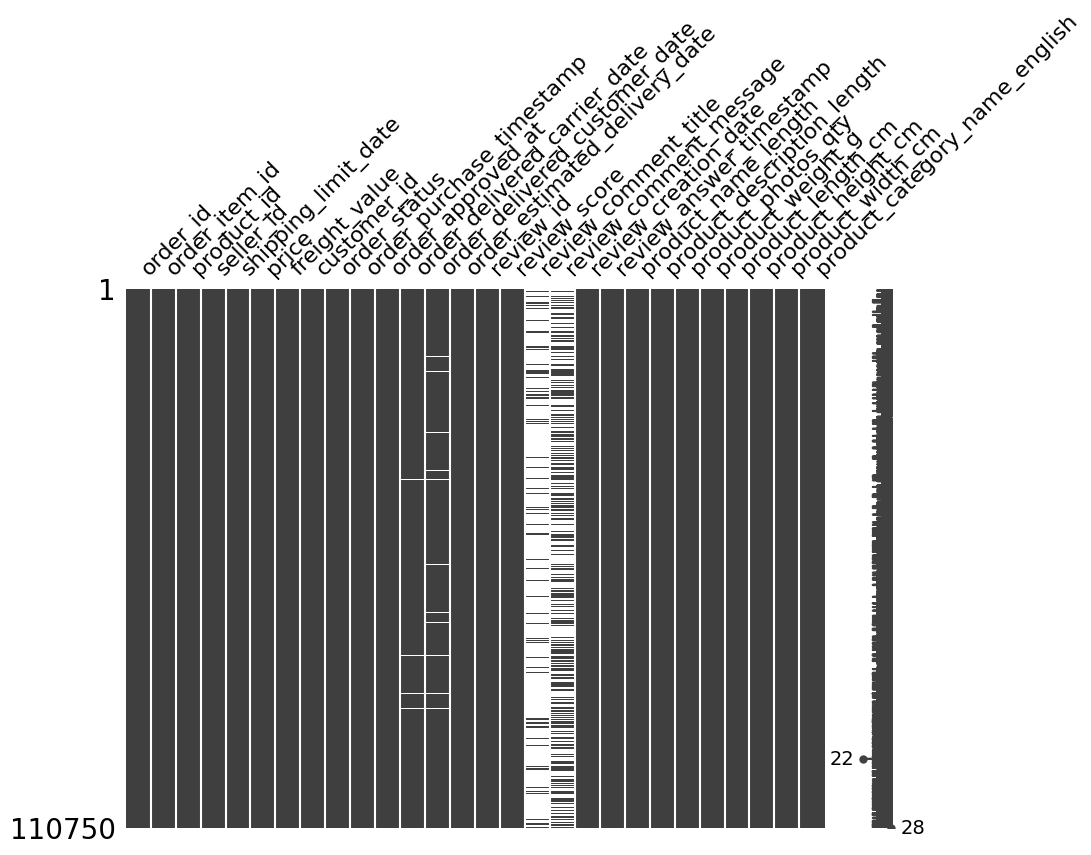

In [9]:
def column_eval(df) -> pd.DataFrame:
    null_count = df.isna().sum()
    total_rows = df.shape[0]
    percent_null = (null_count / total_rows) * 100
    column_dtypes = df.dtypes
    
    null_dataframe = pd.DataFrame(data={"null_count": null_count,
                                        "percent_null": percent_null,
                                        "dytpes": column_dtypes},
                                  index=df.columns)
    return null_dataframe

transactions_eval = column_eval(transactions_df)
display(transactions_eval)
display(msno.matrix(transactions_df, 
                    figsize=(10,7))
        )

##### Dealing with null values

<Axes: >

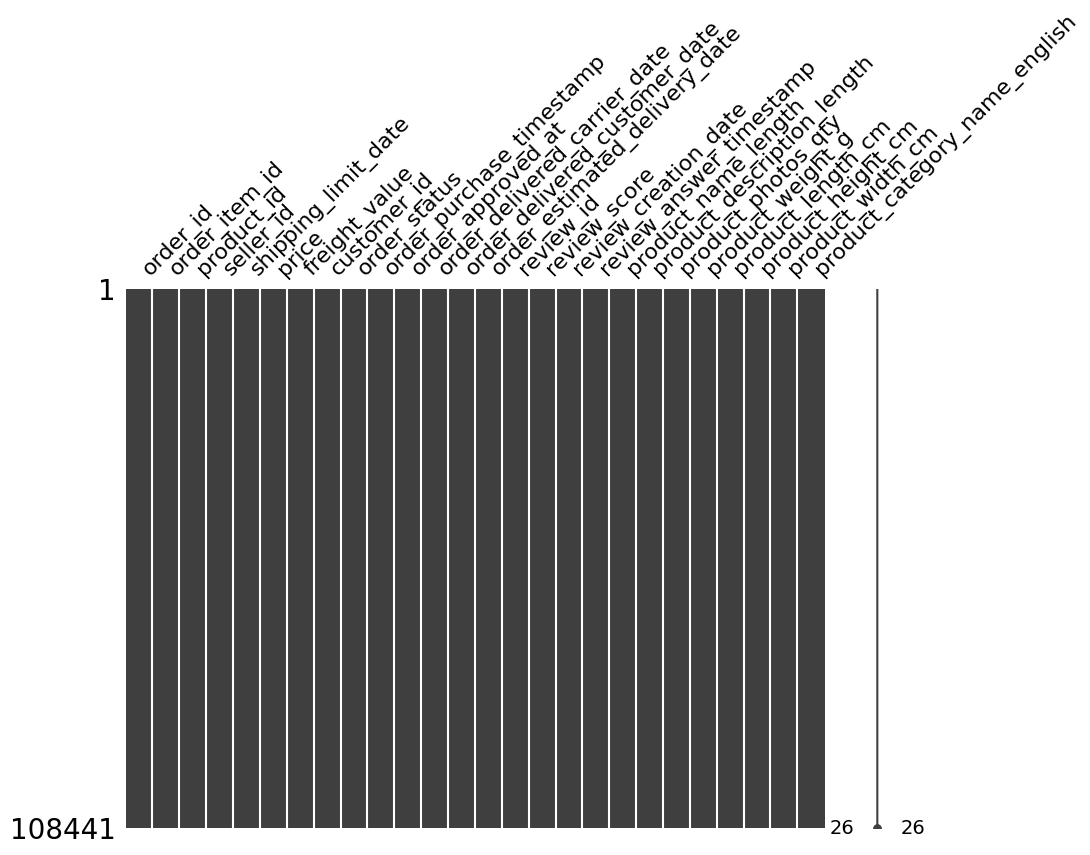

In [10]:
#  remove columns with more than 50% empty values
mostly_null_columns = transactions_eval.query("percent_null > 50").index
transactions_df = transactions_df.drop(columns=mostly_null_columns)

#  remove rows with null values
transactions_df = transactions_df.dropna(axis=0)

display(msno.matrix(transactions_df, 
                    figsize=(10,7) 
                   )
        )

#### Checking for duplicates in the dataset

In [11]:
duplicated = transactions_df.duplicated(subset=["order_id",
                                               "order_item_id",
                                               "product_id",
                                               "customer_id",
                                               "price"
                                               ])

duplicates = transactions_df[duplicated]

sample_duplicate = duplicates.sample().iloc[0,7]

print(f"There are {duplicates.shape[0]} duplicated values")

#  sample duplicated values from this specific customer
print(f"Sample of duplicated transactions from the same customer (customer ID: {sample_duplicate})")
transactions_df.query("customer_id == @sample_duplicate")

There are 635 duplicated values
Sample of duplicated transactions from the same customer (customer ID: 8f9812b5317a9100b7eaf46812a796c2)


order_id  order_item_id  \
71921  2d4f4cfa89af135842ed4770de178752              1   
71922  2d4f4cfa89af135842ed4770de178752              1   

                             product_id                         seller_id  \
71921  50aa8f292a9510d5542f2a078903a2a7  834f8533b2ecb6598dd004ff3de7203a   
71922  50aa8f292a9510d5542f2a078903a2a7  834f8533b2ecb6598dd004ff3de7203a   

      shipping_limit_date  price  freight_value  \
71921 2017-08-14 10:50:17  63.92           15.2   
71922 2017-08-14 10:50:17  63.92           15.2   

                            customer_id order_status order_purchase_timestamp  \
71921  8f9812b5317a9100b7eaf46812a796c2    delivered      2017-08-04 09:48:08   
71922  8f9812b5317a9100b7eaf46812a796c2    delivered      2017-08-04 09:48:08   

       ... review_creation_date review_answer_timestamp product_name_length  \
71921  ...           2017-08-11     2017-08-24 16:04:12                49.0   
71922  ...           2017-08-19     2017-08-24 16:04:24                49.0   

      product_description_length product_photos_qty  product_weight_g  \
71921                     1141.0                2.0             400.0   
71922                     1141.0                2.0             400.0   

      product_length_cm product_height_cm  product_width_cm  \
71921              19.0              11.0              37.0   
71922              19.0              11.0              37.0   

       product_category_name_english  
71921                 sports_leisure  
71922                 sports_leisure  

[2 rows x 26 columns]

##### Dealing with duplicate values

In [12]:
#  removing duplicated values
transactions_df = transactions_df.drop_duplicates(subset=["order_id",
                                                          "order_item_id",
                                                          "product_id",
                                                          "customer_id",
                                                          "price"
                                                          ])

print(f"There are now {transactions_df.shape[0]} rows, which is {duplicates.shape[0]} less than before")

There are now 107806 rows, which is 635 less than before


#### Checking categorical values

In [13]:
categorical_cols = transactions_df.loc[:, transactions_df.dtypes == "object"]
categorical_cols.nunique()

order_id                         94472
product_id                       31474
seller_id                         2907
customer_id                      94472
order_status                         2
review_id                        94043
product_category_name_english       71
dtype: int64

In [14]:
filtered_categ_cols = categorical_cols.loc[:, categorical_cols.nunique() < 100]

for col in filtered_categ_cols:
    print(f"Unique values in {col}")
    display(transactions_df[col].unique())

Unique values in order_status


array(['delivered', 'canceled'], dtype=object)

Unique values in product_category_name_english


array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto',
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'cine_p

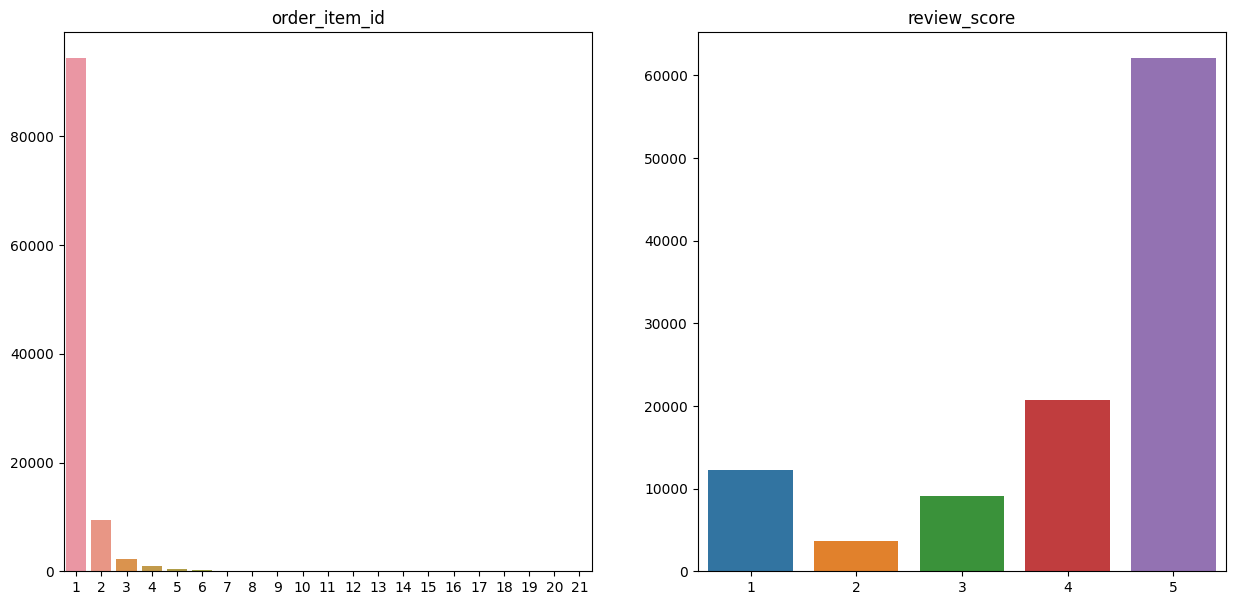

In [15]:
int_cols = transactions_df.loc[:, transactions_df.dtypes == "int64"]

fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(int_cols):
    plt.subplot(1,2,i+1, label=col)
    int_frequency = transactions_df[col].value_counts()
    sns.barplot(x=int_frequency.index, y=int_frequency.values)
    plt.title(col)

#### Checking numerical columns (outlier detection)

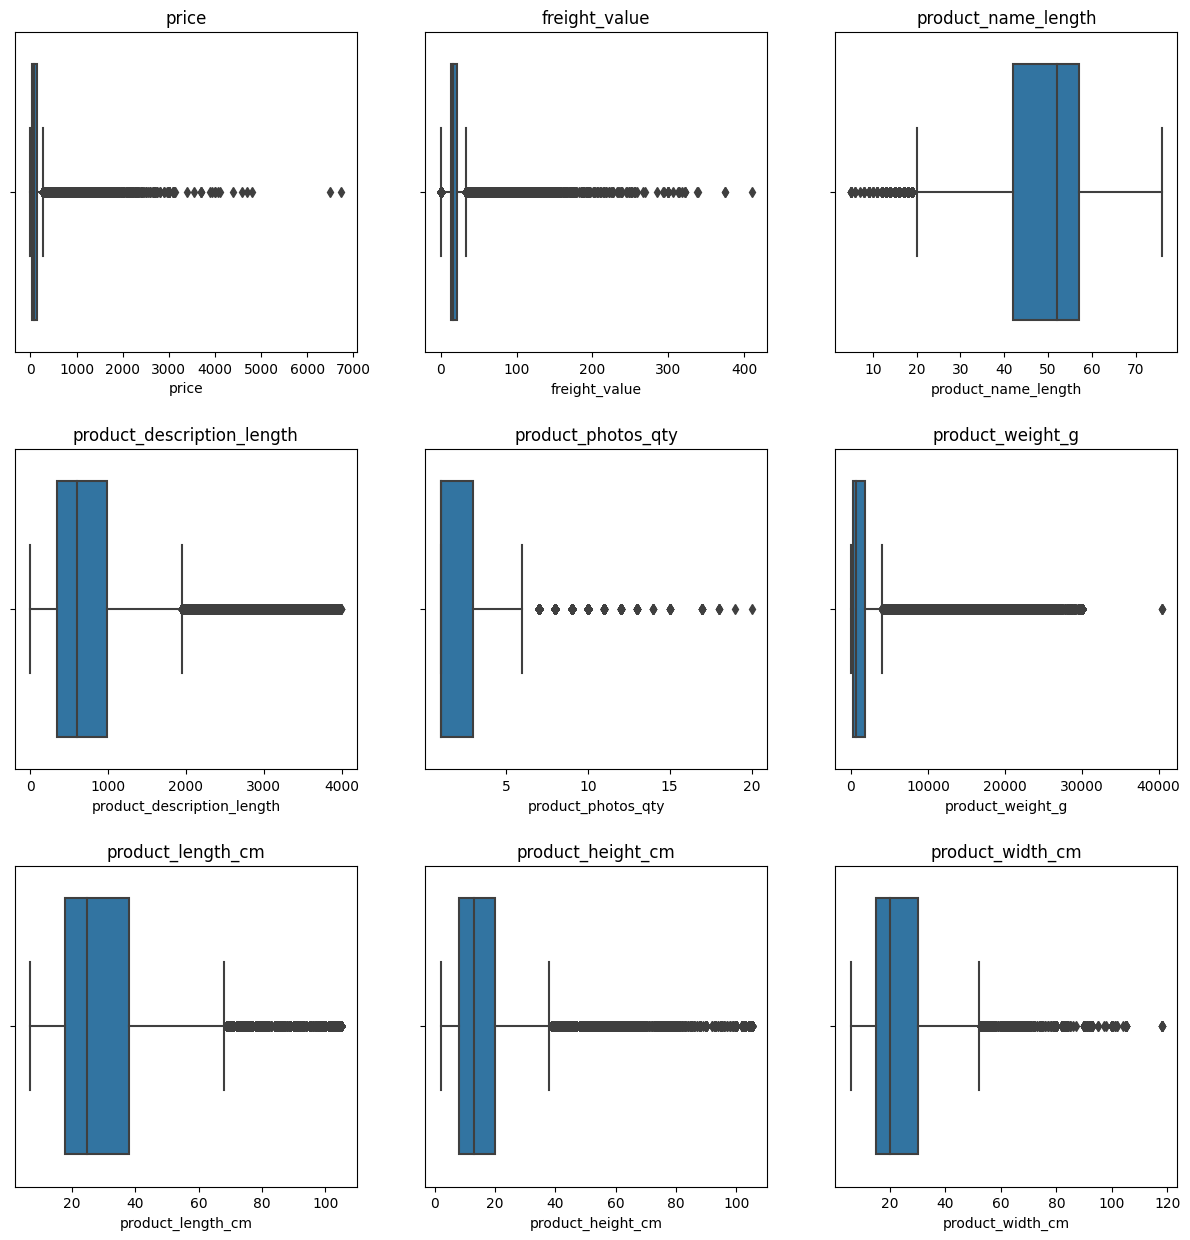

In [16]:
float_cols = transactions_df.loc[:, transactions_df.dtypes == "float64"]

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(float_cols):
    plt.subplot(3,3,i+1, label=col)
    sns.boxplot(data=transactions_df, x=col)
    plt.title(col)

#### Checking datetime columns

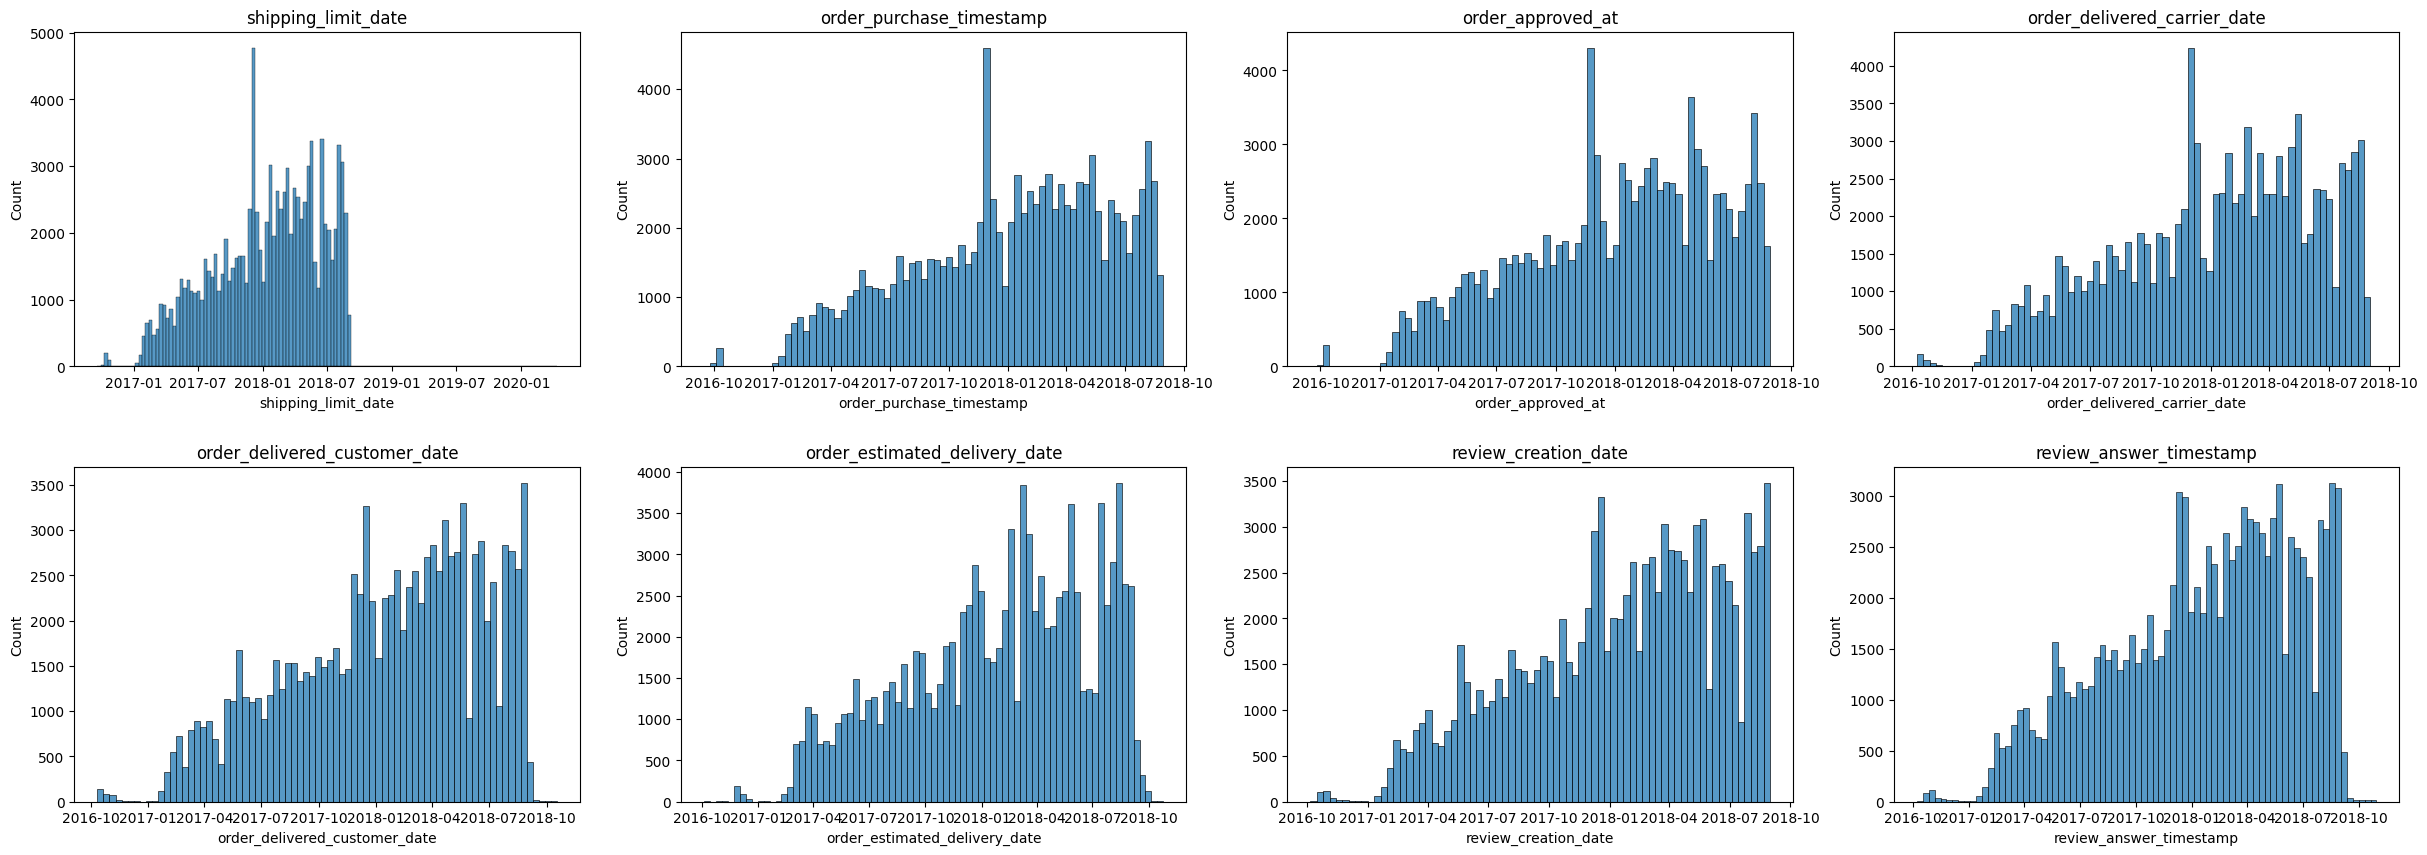

In [17]:
datetime_cols = transactions_df.loc[:, transactions_df.dtypes == "datetime64[ns]"]

fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.3)

for i, col in enumerate(datetime_cols):
    plt.subplot(2,4,i+1, label=col)
    sns.histplot(data=transactions_df, x=col)
    plt.title(col)

### Feature engineering

#### Feature selection

In [18]:
relevant_features = ['product_id',
                     'price',
                     'order_purchase_timestamp',
                     'review_score',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm',
                     'product_category_name_english',
                     ]

Why are the others deemed irrelevant? yung mga ibang dates can be useful when optimizing price for freight but that's not what we're doing naman

In [19]:
main_df = transactions_df.copy()
main_df = main_df[relevant_features]
main_df.sample(5)

product_id   price order_purchase_timestamp  \
39348  bdc3291ab242ec1effc8eb0987850268   26.90      2018-06-07 17:11:03   
21089  d5b703c271f43f9c588a6f512a00f77e   34.90      2018-03-15 08:16:56   
22903  8b50a72d52d7a91fb19d19fbe069e2f2   44.99      2018-05-09 10:52:33   
55481  e68a5a5626c4b1bfc5ca78202f898300  209.99      2018-03-28 08:03:41   
36767  7bdb28a55646012fb3348058d629d9bc   59.90      2018-08-19 15:30:23   

       review_score  product_weight_g  product_length_cm  product_height_cm  \
39348             5             541.0               19.0               12.0   
21089             5             150.0               16.0                7.0   
22903             5             250.0               20.0                8.0   
55481             5            2100.0               42.0               25.0   
36767             5            2750.0              103.0               12.0   

       product_width_cm product_category_name_english  
39348              16.0                   electronics  
21089              20.0                          toys  
22903              13.0                    housewares  
55481              15.0                    cool_stuff  
36767              17.0           musical_instruments

#### Feature generation

In [20]:
main_df["day_of_week"] = main_df["order_purchase_timestamp"].dt.day_of_week
main_df["is_weekday"] = main_df["day_of_week"] < 5
main_df["month"] = main_df["order_purchase_timestamp"].dt.month
main_df["year"] = main_df["order_purchase_timestamp"].dt.year
main_df["hour"] = main_df["order_purchase_timestamp"].dt.hour
main_df["date_purchased"] = pd.to_datetime(main_df["order_purchase_timestamp"].dt.date)
main_df.sample(5)

product_id   price order_purchase_timestamp  \
11476  93c902b021a9e594f658ab1b0351602a   97.90      2018-02-21 18:24:07   
15381  036734b5a58d5d4f46b0616ddc047ced   29.99      2017-11-12 21:43:58   
2352   ec02a5d380128f7a188e9ce8f3ddd832  131.90      2017-12-12 04:45:54   
17700  165f86fe8b799a708a20ee4ba125c289  146.99      2017-10-22 17:04:22   
60447  bb90206fa281c20f0b4c42a2393b54dd  199.90      2017-11-06 08:53:06   

       review_score  product_weight_g  product_length_cm  product_height_cm  \
11476             3            1250.0               26.0               10.0   
15381             5             300.0               17.0                4.0   
2352              5            2275.0               45.0               25.0   
17700             5            2425.0               29.0               30.0   
60447             1             875.0               35.0               14.0   

       product_width_cm product_category_name_english  day_of_week  \
11476              18.0                   electronics            2   
15381              12.0                     telephony            6   
2352               18.0                    cool_stuff            1   
17700              19.0                    cool_stuff            6   
60447              14.0         computers_accessories            0   

       is_weekday  month  year  hour date_purchased  
11476        True      2  2018    18     2018-02-21  
15381       False     11  2017    21     2017-11-12  
2352         True     12  2017     4     2017-12-12  
17700       False     10  2017    17     2017-10-22  
60447        True     11  2017     8     2017-11-06

In [21]:
main_df["product_volume_cm3"] = main_df["product_length_cm"] * main_df["product_width_cm"] * main_df["product_height_cm"]
main_df.sample(5)

product_id   price order_purchase_timestamp  \
90304  37095a57db396667492dcd7e10f5b792  158.67      2018-03-28 13:22:47   
8697   4fe644d766c7566dbc46fb851363cb3b   99.99      2018-04-30 00:00:01   
73524  7be620cd314ce6460033ba9017be7a7f   41.80      2017-11-28 15:57:03   
33313  371fa349d92646bbeea5873df0bcdc5a   24.62      2017-11-21 21:40:05   
7116   1e1a186a03f0d98268516827690d4fd2   74.00      2018-06-01 17:51:35   

       review_score  product_weight_g  product_length_cm  product_height_cm  \
90304             5             850.0               16.0               10.0   
8697              4            1700.0               65.0                6.0   
73524             5            1238.0               32.0               35.0   
33313             1             490.0               20.0               18.0   
7116              5             575.0               16.0               18.0   

       product_width_cm product_category_name_english  day_of_week  \
90304              11.0                  garden_tools            2   
8697               50.0                           art            0   
73524              17.0                          toys            1   
33313              16.0                    housewares            1   
7116               17.0                          baby            4   

       is_weekday  month  year  hour date_purchased  product_volume_cm3  
90304        True      3  2018    13     2018-03-28              1760.0  
8697         True      4  2018     0     2018-04-30             19500.0  
73524        True     11  2017    15     2017-11-28             19040.0  
33313        True     11  2017    21     2017-11-21              5760.0  
7116         True      6  2018    17     2018-06-01              4896.0

#### Final diagnosis of main_df

In [22]:
main_df.sample(5)

product_id   price order_purchase_timestamp  \
754    368c6c730842d78016ad823897a372db   59.90      2017-08-30 11:25:53   
13515  2136c70bbe723d338fab53da3c03e6dc   29.00      2017-07-18 13:35:38   
58272  23384f296aa1bf6461d22912093a9847   20.00      2017-01-24 21:16:24   
88656  2ae5ed1d99afbb14a8b24041a81df16b   59.99      2018-06-29 15:50:44   
25137  c94d19d021d4a8fbae5a45f904aeea90  114.97      2017-08-01 21:27:25   

       review_score  product_weight_g  product_length_cm  product_height_cm  \
754               5            1650.0               30.0               22.0   
13515             5             200.0               16.0                2.0   
58272             5             100.0               16.0               10.0   
88656             5            1450.0               37.0                9.0   
25137             5            9750.0               27.0               15.0   

       product_width_cm product_category_name_english  day_of_week  \
754                30.0                  garden_tools            2   
13515              11.0                 watches_gifts            1   
58272              16.0                bed_bath_table            1   
88656              30.0                bed_bath_table            4   
25137              92.0         furniture_living_room            1   

       is_weekday  month  year  hour date_purchased  product_volume_cm3  
754          True      8  2017    11     2017-08-30             19800.0  
13515        True      7  2017    13     2017-07-18               352.0  
58272        True      1  2017    21     2017-01-24              2560.0  
88656        True      6  2018    15     2018-06-29              9990.0  
25137        True      8  2017    21     2017-08-01             37260.0

In [23]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107806 entries, 0 to 110749
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     107806 non-null  object        
 1   price                          107806 non-null  float64       
 2   order_purchase_timestamp       107806 non-null  datetime64[ns]
 3   review_score                   107806 non-null  int64         
 4   product_weight_g               107806 non-null  float64       
 5   product_length_cm              107806 non-null  float64       
 6   product_height_cm              107806 non-null  float64       
 7   product_width_cm               107806 non-null  float64       
 8   product_category_name_english  107806 non-null  object        
 9   day_of_week                    107806 non-null  int64         
 10  is_weekday                     107806 non-null  bool          
 11  

In [24]:
main_row, main_col = main_df.shape

print(f"main_df has a total of {main_row} entries and {main_col} features.")

main_df has a total of 107806 entries and 16 features.


## Exploratory Data Analysis (EDA)

### Sampling for our dataset

In [25]:
sampled_df = main_df.copy()
sampled_df = sampled_df.sample(frac=.2, random_state=25)
sampled_df

product_id   price order_purchase_timestamp  \
69574   113f80f12c8892f0c59206f70b862b40   19.90      2018-07-14 09:47:09   
109365  367f4a5ae70f2e8de8d9eb1c13f280b1    9.00      2017-05-26 15:53:43   
10626   19c91ef95d509ea33eda93495c4d3481  122.99      2018-08-07 20:27:57   
79627   6cbe4bd19efc4606eb2a9448a47e232e   38.90      2018-02-15 10:03:54   
44343   704ef63ad0ac345842ea734060a83db2   74.90      2018-01-12 18:43:34   
...                                  ...     ...                      ...   
17383   f5badee8a0e679f057ec0ca4f0f32dcb  109.90      2017-11-25 09:20:17   
43099   85337022853da10b8f5fd7d1ef180421   39.90      2017-08-27 14:11:40   
31246   ce4951e4e9e73626368438f1dbc05dd2   33.00      2018-02-26 14:31:31   
42027   65266b2da20d04dbe00c5c2d3bb7859e   23.90      2018-05-14 14:36:06   
26724   77d1b9fb8d3858f503316105e9ac6c51   18.99      2018-04-23 00:34:50   

        review_score  product_weight_g  product_length_cm  product_height_cm  \
69574              5             250.0               16.0               10.0   
109365             5            1950.0               20.0                6.0   
10626              4             700.0               25.0               12.0   
79627              4             300.0               30.0               20.0   
44343              4             850.0               38.0               10.0   
...              ...               ...                ...                ...   
17383              5             450.0               20.0               10.0   
43099              2             200.0               25.0                5.0   
31246              5             400.0               16.0               23.0   
42027              5             250.0               51.0               15.0   
26724              2              50.0               19.0                3.0   

        product_width_cm    product_category_name_english  day_of_week  \
69574               16.0                   bed_bath_table            5   
109365              20.0                   sports_leisure            4   
10626               19.0                    health_beauty            1   
79627               20.0                   consoles_games            3   
44343               38.0                   bed_bath_table            4   
...                  ...                              ...          ...   
17383               15.0  construction_tools_construction            5   
43099               15.0                   consoles_games            6   
31246               11.0                  books_technical            0   
42027               15.0                       stationery            0   
26724               11.0                        telephony            0   

        is_weekday  month  year  hour date_purchased  product_volume_cm3  
69574        False      7  2018     9     2018-07-14              2560.0  
109365        True      5  2017    15     2017-05-26              2400.0  
10626         True      8  2018    20     2018-08-07              5700.0  
79627         True      2  2018    10     2018-02-15             12000.0  
44343         True      1  2018    18     2018-01-12             14440.0  
...            ...    ...   ...   ...            ...                 ...  
17383        False     11  2017     9     2017-11-25              3000.0  
43099        False      8  2017    14     2017-08-27              1875.0  
31246         True      2  2018    14     2018-02-26              4048.0  
42027         True      5  2018    14     2018-05-14             11475.0  
26724         True      4  2018     0     2018-04-23               627.0  

[21561 rows x 16 columns]

### Checking out distribution of features

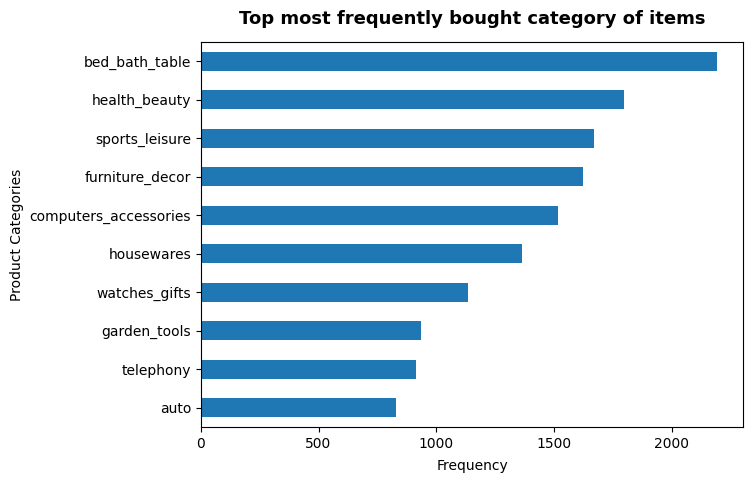

In [26]:
fig, ax = plt.subplots(figsize=(7,5))

(sampled_df
 .groupby("product_category_name_english")["product_id"]
 .count()
 .sort_values(ascending=False)
 .head(10)
 .plot
 .barh(ax=ax)
 .invert_yaxis()
 )

ax.set_title("Top most frequently bought category of items",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_xlabel("Frequency", labelpad=6)
ax.set_ylabel("Product Categories")

plt.savefig("viz/top_bought_items.png", format="png", transparent=True, bbox_inches="tight")

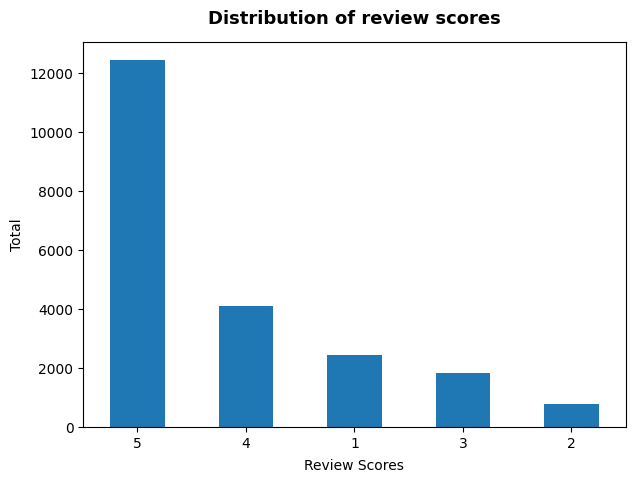

In [27]:
fig, ax = plt.subplots(figsize=(7,5))

(sampled_df
 .review_score
 .value_counts()
 .plot
 .bar(rot=0, ax=ax))

ax.set_title("Distribution of review scores",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_xlabel("Review Scores", labelpad=6)
ax.set_ylabel("Total")

plt.savefig("viz/review_scores_dist.png", format="png", transparent=True, bbox_inches="tight")

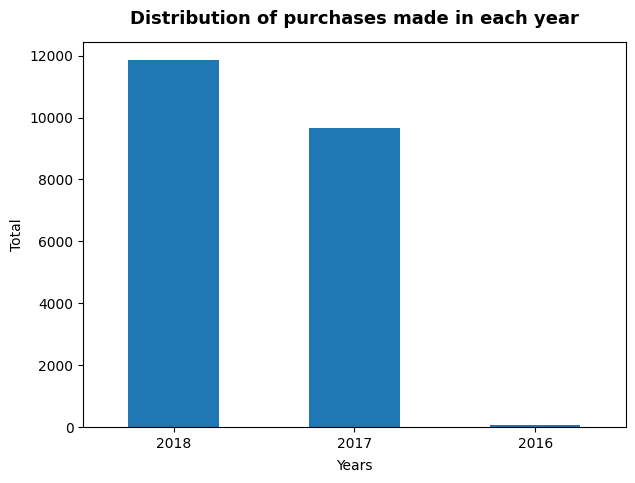

In [28]:
fig, ax = plt.subplots(figsize=(7,5))

(sampled_df
 .year
 .value_counts()
 .plot
 .bar(rot=0,
      ax=ax))

ax.set_title("Distribution of purchases made in each year",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_xlabel("Years", labelpad=6)
ax.set_ylabel("Total")

plt.savefig("viz/yearly_purchases_dist.png", format="png", transparent=True, bbox_inches="tight")

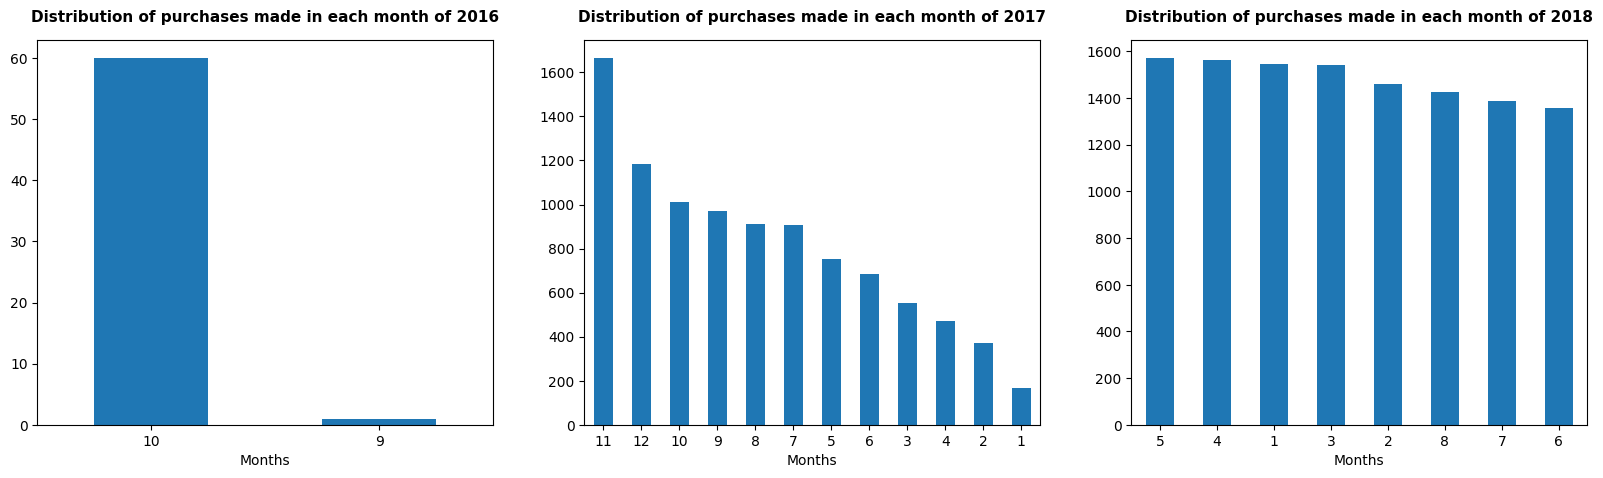

In [29]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

years = sampled_df.year.sort_values().unique()

for i, year in enumerate(years):
    (sampled_df
    .query("year == @year")
    .month
    .value_counts()
    .plot
    .bar(rot=0,
        ax=ax[i])
    )
    
    ax[i].set_title(f"Distribution of purchases made in each month of {year}",
                    fontdict={"size": 11,
                              "weight": "bold"},
                    pad=13)
    ax[i].set_xlabel("Months")
    
plt.savefig("viz/monthly_purchases_dist.png", format="png", transparent=True, bbox_inches="tight")

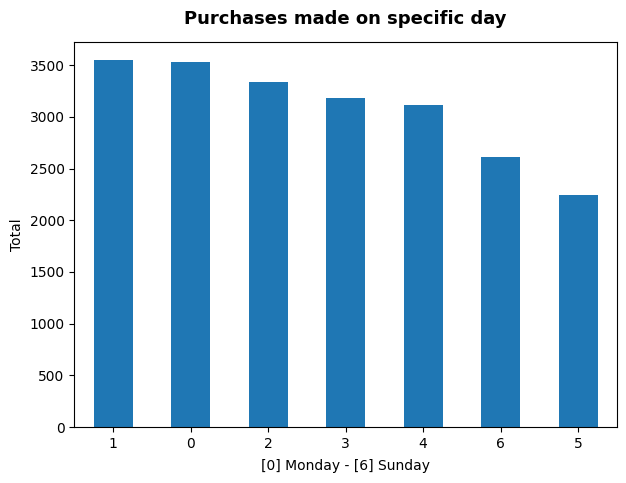

In [30]:
fig, ax = plt.subplots(figsize=(7,5))

(sampled_df
 .day_of_week.
 value_counts()
 .plot
 .bar(rot=0, ax=ax)
 )

ax.set_title("Purchases made on specific day",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_xlabel("[0] Monday - [6] Sunday", labelpad=6)
ax.set_ylabel("Total")

plt.savefig("viz/daily_purchases_dist.png", format="png", transparent=True, bbox_inches="tight")

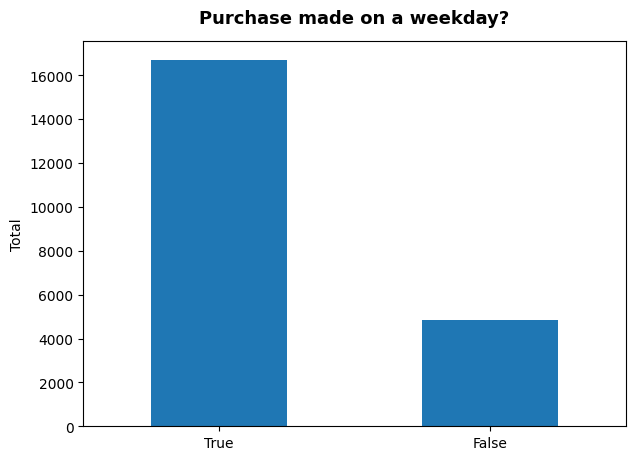

In [31]:
fig, ax = plt.subplots(figsize=(7,5))

(sampled_df
 .is_weekday
 .value_counts()
 .plot
 .bar(rot=0, ax=ax)
 )

ax.set_title("Purchase made on a weekday?",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_ylabel("Total")

plt.savefig("viz/weekday_purchases_dist.png", format="png", transparent=True, bbox_inches="tight")

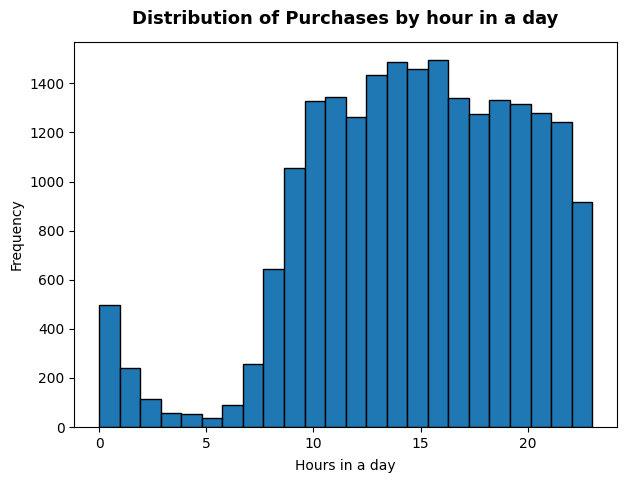

In [32]:
fig, ax = plt.subplots(figsize=(7,5))

(sampled_df
 .hour
 .plot
 .hist(bins=24,edgecolor="black", ax=ax))

ax.set_title("Distribution of Purchases by hour in a day",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_xlabel("Hours in a day", labelpad=6)
ax.set_ylabel("Frequency")

plt.savefig("viz/dailyhourly_purchases_dist.png", format="png", transparent=True, bbox_inches="tight")

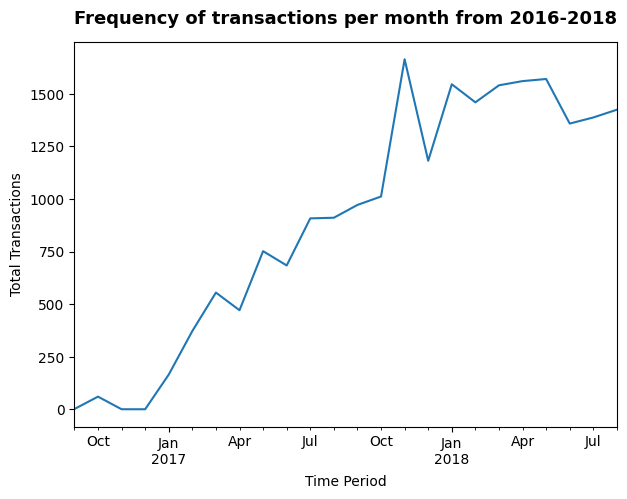

In [33]:
fig, ax = plt.subplots(figsize=(7,5))

(sampled_df
 .groupby(pd.Grouper(key="date_purchased", freq="M"))["product_id"]
 .count()
 .plot
 .line(ax=ax)
 )

ax.set_title("Frequency of transactions per month from 2016-2018",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_xlabel("Time Period", labelpad=6)
ax.set_ylabel("Total Transactions")

plt.savefig("viz/transactions_line.png", format="png", transparent=True, bbox_inches="tight")

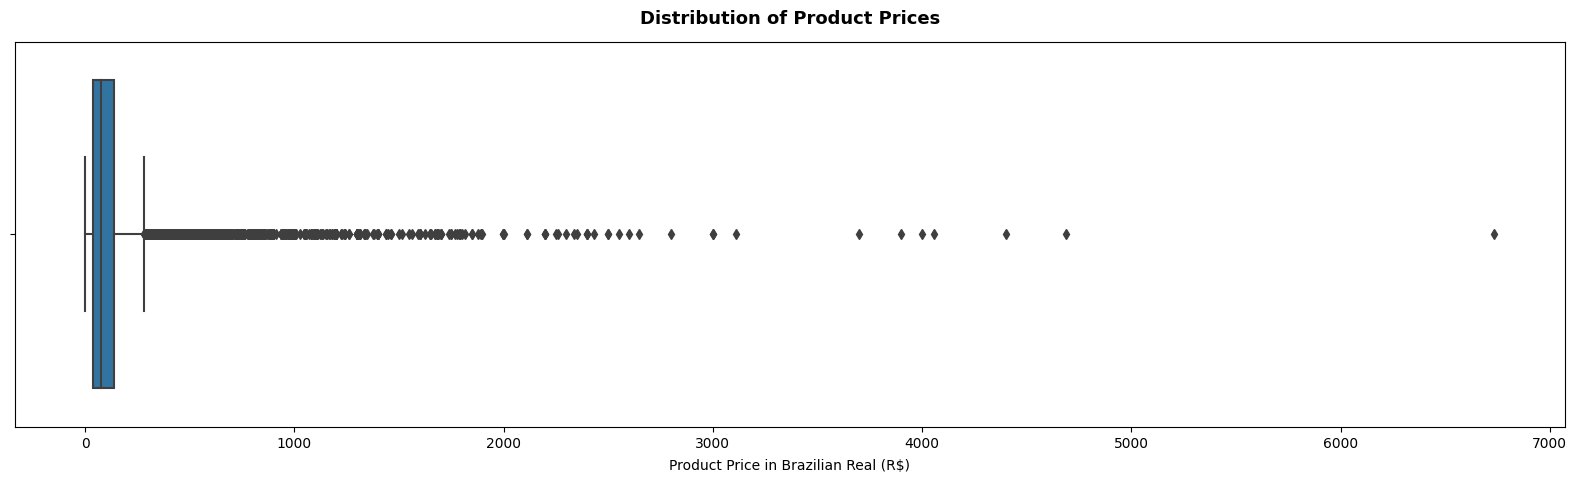

In [34]:
fig, ax = plt.subplots(figsize=(20,5))

sns.boxplot(data=sampled_df,
            x="price")

ax.set_title("Distribution of Product Prices",
             fontdict={"size": 13,
                       "weight": "bold"},
             pad=13)
ax.set_xlabel("Product Price in Brazilian Real (R$)", labelpad=6)

plt.savefig("viz/prices_dist.png", format="png", transparent=True, bbox_inches="tight")

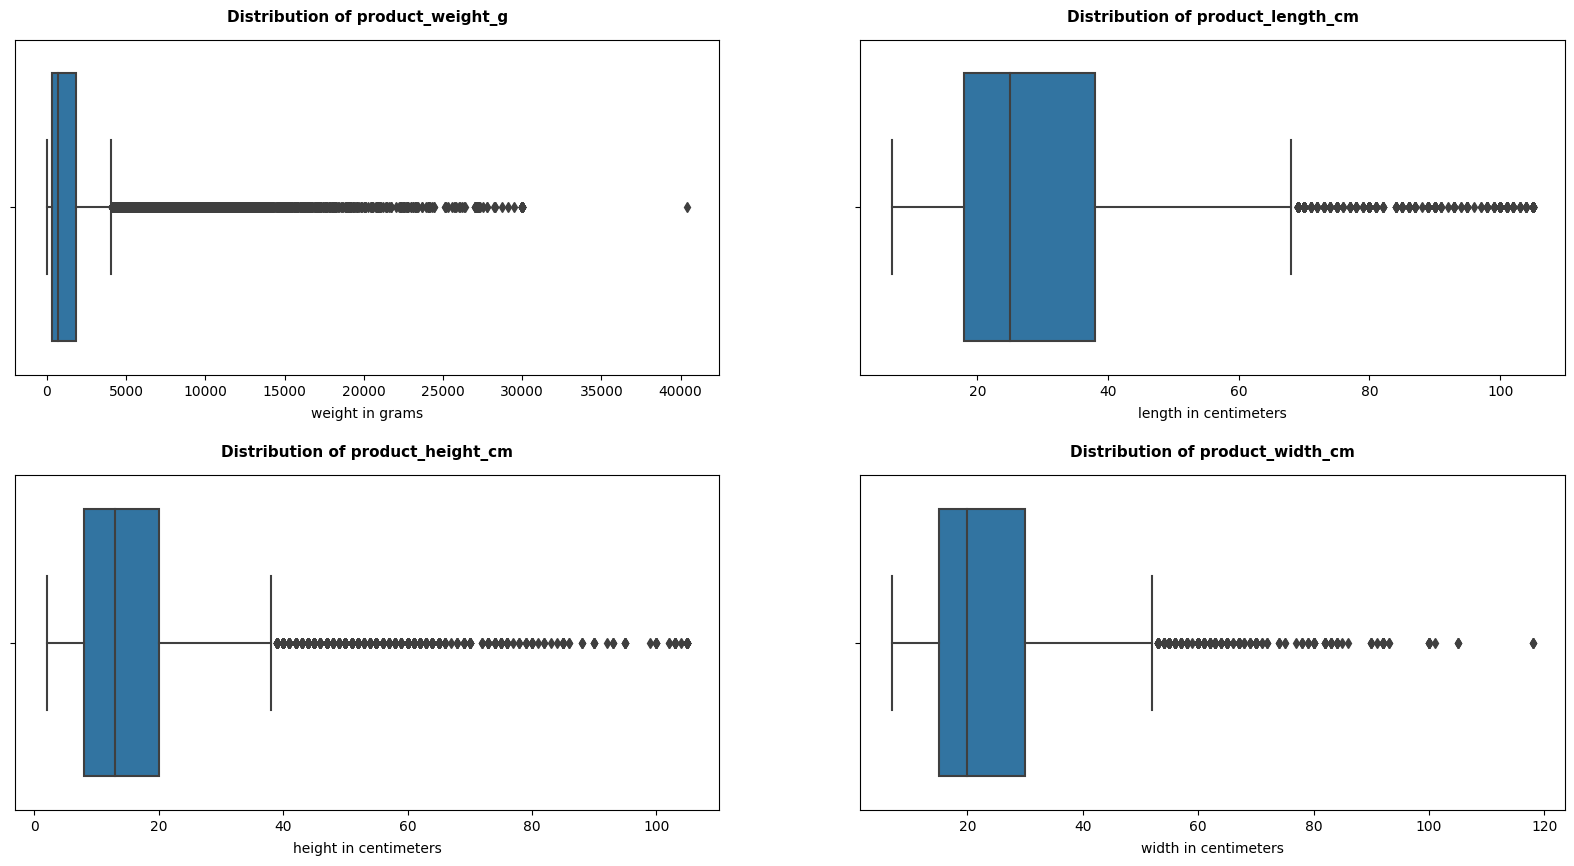

In [35]:
product_dimensions_df = sampled_df.iloc[:, 4:8]

units = ["weight in grams",
         "length in centimeters",
         "height in centimeters",
         "width in centimeters",]

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.3)

for i, feature in enumerate(product_dimensions_df.columns):
    plt.subplot(2,2,i+1, label=col)
    sns.boxplot(data=product_dimensions_df, 
                x=feature)
    plt.title(f"Distribution of {feature}",
                    fontdict={"size": 11,
                              "weight": "bold"},
                    pad=13)
    plt.xlabel(f"{units[i]}",
               labelpad=6)
    
plt.savefig("viz/product_dimensions_dist.png", format="png", transparent=True, bbox_inches="tight")

## Prepping the Data for Modelling

#### Creating dummy variables

In [37]:
#  adopting the sampled dataset
main_df = sampled_df.copy()

label_encoder = LabelEncoder()

main_df["product_category_name_english"] = label_encoder.fit_transform(main_df["product_category_name_english"])
main_df['is_weekday'] = label_encoder.fit_transform(main_df["is_weekday"])

main_df

product_id   price order_purchase_timestamp  \
69574   113f80f12c8892f0c59206f70b862b40   19.90      2018-07-14 09:47:09   
109365  367f4a5ae70f2e8de8d9eb1c13f280b1    9.00      2017-05-26 15:53:43   
10626   19c91ef95d509ea33eda93495c4d3481  122.99      2018-08-07 20:27:57   
79627   6cbe4bd19efc4606eb2a9448a47e232e   38.90      2018-02-15 10:03:54   
44343   704ef63ad0ac345842ea734060a83db2   74.90      2018-01-12 18:43:34   
...                                  ...     ...                      ...   
17383   f5badee8a0e679f057ec0ca4f0f32dcb  109.90      2017-11-25 09:20:17   
43099   85337022853da10b8f5fd7d1ef180421   39.90      2017-08-27 14:11:40   
31246   ce4951e4e9e73626368438f1dbc05dd2   33.00      2018-02-26 14:31:31   
42027   65266b2da20d04dbe00c5c2d3bb7859e   23.90      2018-05-14 14:36:06   
26724   77d1b9fb8d3858f503316105e9ac6c51   18.99      2018-04-23 00:34:50   

        review_score  product_weight_g  product_length_cm  product_height_cm  \
69574              5             250.0               16.0               10.0   
109365             5            1950.0               20.0                6.0   
10626              4             700.0               25.0               12.0   
79627              4             300.0               30.0               20.0   
44343              4             850.0               38.0               10.0   
...              ...               ...                ...                ...   
17383              5             450.0               20.0               10.0   
43099              2             200.0               25.0                5.0   
31246              5             400.0               16.0               23.0   
42027              5             250.0               51.0               15.0   
26724              2              50.0               19.0                3.0   

        product_width_cm  product_category_name_english  day_of_week  \
69574               16.0                              7            5   
109365              20.0                             64            4   
10626               19.0                             43            1   
79627               20.0                             16            3   
44343               38.0                              7            4   
...                  ...                            ...          ...   
17383               15.0                             17            5   
43099               15.0                             16            6   
31246               11.0                             10            0   
42027               15.0                             65            0   
26724               11.0                             67            0   

        is_weekday  month  year  hour date_purchased  product_volume_cm3  
69574            0      7  2018     9     2018-07-14              2560.0  
109365           1      5  2017    15     2017-05-26              2400.0  
10626            1      8  2018    20     2018-08-07              5700.0  
79627            1      2  2018    10     2018-02-15             12000.0  
44343            1      1  2018    18     2018-01-12             14440.0  
...            ...    ...   ...   ...            ...                 ...  
17383            0     11  2017     9     2017-11-25              3000.0  
43099            0      8  2017    14     2017-08-27              1875.0  
31246            1      2  2018    14     2018-02-26              4048.0  
42027            1      5  2018    14     2018-05-14             11475.0  
26724            1      4  2018     0     2018-04-23               627.0  

[21561 rows x 16 columns]

#### Converting non-integers, non-string, and non-datetime columns to integer

In [38]:
non_int_cols = main_df.loc[:, (main_df.dtypes != "int64") & (main_df.dtypes != "datetime64[ns]") & (main_df.dtypes != "object")].columns

for cols in non_int_cols:
    main_df[cols] = main_df[cols].astype("int64")
    
main_df.dtypes

product_id                               object
price                                     int64
order_purchase_timestamp         datetime64[ns]
review_score                              int64
product_weight_g                          int64
product_length_cm                         int64
product_height_cm                         int64
product_width_cm                          int64
product_category_name_english             int64
day_of_week                               int64
is_weekday                                int64
month                                     int64
year                                      int64
hour                                      int64
date_purchased                   datetime64[ns]
product_volume_cm3                        int64
dtype: object

#### Selecting features

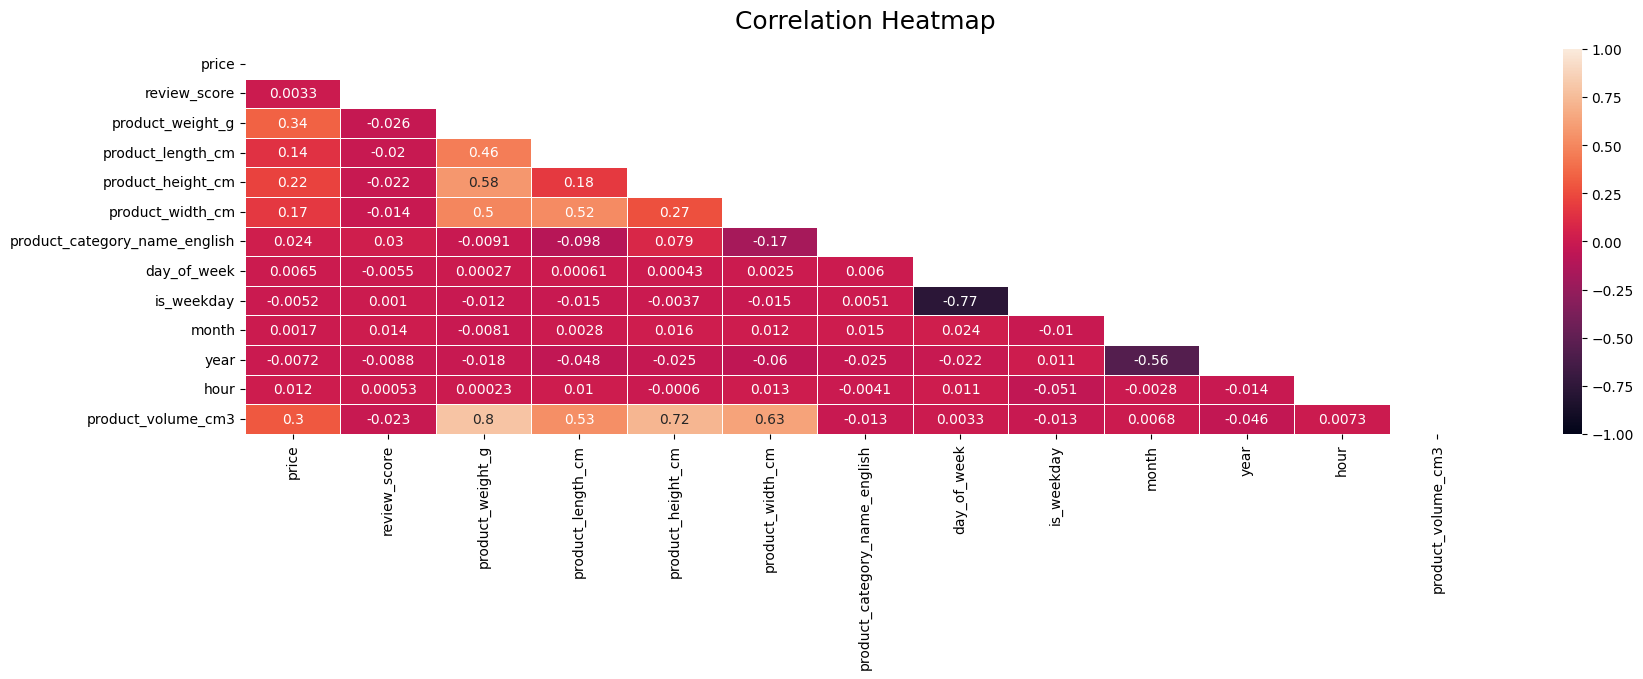

In [39]:
mask = np.triu(np.ones_like(main_df.corr(numeric_only=True)))
corr = main_df.corr(numeric_only=True)

plt.figure(figsize=(20, 5))
sns.heatmap(corr,
            mask=mask, 
            annot=True, 
            vmin=-1,
            vmax=1,
            linewidths=.5)
plt.title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=15);
plt.savefig("viz/corr_heatmap.png", format="png", transparent=True, bbox_inches="tight")


#### Filtering main dataset with positively correlated features

In [40]:
correlated_features = ["price",
                       "product_weight_g",
                       "product_length_cm",
                       "product_height_cm",
                       "product_width_cm",
                       "product_volume_cm3",
                       "review_score"
                       ]

main_df = main_df[correlated_features]

#### Scaling dataset

In [41]:
# scaler = MinMaxScaler()

# main_df = pd.DataFrame(scaler.fit_transform(main_df), columns=main_df.columns)

#### Splitting main dataset

In [42]:
#  split dataset in features and target variables
X, y = main_df.iloc[:, 1:], main_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Regression Trees for Price Optimization

### Building Regression Tree Model

In [44]:
# Create Decision Tree Regressor
reg_tree = DecisionTreeRegressor(random_state=40)

# Train Decision Tree Regressor
reg_tree = reg_tree.fit(X_train,y_train)

#  Evaluating the reg_tree 
train_pred = reg_tree.predict(X_train)
train_score = reg_tree.score(X_train, y_train)
train_mse = mean_squared_error(y_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}")

Training Set Scores
MSE: 387.17990918955803
RMSE: 19.676887690627247
R-square: 0.9887921442790625


#### Evaluating the Initial Model

In [45]:
#  Evaluating the reg_tree 
test_pred = reg_tree.predict(X_test)
test_score = reg_tree.score(X_test, y_test)
test_mse = mean_squared_error(y_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

base_results_dict = {"score": test_score,
                     "MSE": test_mse,
                     "RMSE": test_mse**(1/2)}

Testing Set Scores
MSE: 44397.4771126771
RMSE: 210.70708842532352
R-square: 0.01022465141798179


In [46]:
# # Model Accuracy, how often is the classifier correct
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#### Hyperparameter tuning

In [47]:
param_grid = {"criterion": ["squared_error", "absolute_error", "poisson"],
              "splitter":  ["best", "random"],
              "max_features": ["sqrt", "log2"],
              "min_samples_leaf": range(2,11),
              "max_depth": range(5,21)
              }

##### Using RandomizedSearchCV

In [48]:
reg_tree_rs = DecisionTreeRegressor(random_state=40)
random_search = RandomizedSearchCV(estimator=reg_tree_rs, 
                                   param_distributions=param_grid,
                                   verbose=3,
                                   return_train_score=True)
random_search = random_search.fit(X_train, y_train)

best_params_rs = random_search.best_params_
best_regtree_rs = DecisionTreeRegressor(criterion=best_params_rs["criterion"],
                                        max_features=best_params_rs["max_features"],
                                        min_samples_leaf=best_params_rs["min_samples_leaf"],
                                        splitter=best_params_rs["splitter"],
                                        random_state=40)

best_regtree_rs = best_regtree_rs.fit(X_train, y_train)

training_score = best_regtree_rs.score(X_train, y_train)

print(best_params_rs)

#  Evaluating the train set with best_regtree_rs 
train_pred = best_regtree_rs.predict(X_train)
train_score = best_regtree_rs.score(X_train, y_train)
train_mse = mean_squared_error(y_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}\n")

#  Evaluating the test set with best_regtree_rs 
test_pred = best_regtree_rs.predict(X_test)
test_score = best_regtree_rs.score(X_test, y_test)
test_mse = mean_squared_error(y_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

rs_results_dict = {"score": test_score,
                   "MSE": test_mse,
                   "RMSE": test_mse**(1/2)}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=(train=0.133, test=0.107) total time=   0.9s
[CV 2/5] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=(train=0.114, test=0.025) total time=   0.9s
[CV 3/5] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=(train=0.099, test=0.090) total time=   0.9s
[CV 4/5] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=(train=0.095, test=0.065) total time=   0.9s
[CV 5/5] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=(train=0.093, test=0.090) total time=   0.8s
[CV 1/5] END criterion=absolute_error, max_depth=13, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=(train=0.082, test

##### Using GridSearchCV

In [49]:
reg_tree_gs = DecisionTreeRegressor(random_state=40)
grid_search = GridSearchCV(estimator=reg_tree_gs, 
                           param_grid=param_grid,
                           verbose=3,
                           return_train_score=True)
grid_search = grid_search.fit(X_train, y_train)

best_params_gs = grid_search.best_params_
best_regtree_gs = DecisionTreeRegressor(criterion=best_params_gs["criterion"],
                                        max_features=best_params_gs["max_features"],
                                        min_samples_leaf=best_params_gs["min_samples_leaf"],
                                        splitter=best_params_gs["splitter"],
                                        random_state=40)

best_regtree_gs = best_regtree_gs.fit(X_train, y_train)

training_score = best_regtree_gs.score(X_train, y_train)

print(best_params_gs)

#  Evaluating the train set with best_regtree_gs 
train_pred = best_regtree_gs.predict(X_train)
train_score = best_regtree_gs.score(X_train, y_train)
train_mse = mean_squared_error(y_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}\n")

#  Evaluating the test set with best_regtree_gs 
test_pred = best_regtree_gs.predict(X_test)
test_score = best_regtree_gs.score(X_test, y_test)
test_mse = mean_squared_error(y_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

gs_results_dict = {"score": test_score,
                   "MSE": test_mse,
                   "RMSE": test_mse**(1/2)}

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV 1/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.246, test=0.118) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.238, test=0.132) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.255, test=0.139) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.234, test=0.033) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.201, test=-0.015) total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=(train=0.130, test=0.088) total tim

##### Selecting best parameters to use from the 3 different parameters suggested (using test scores as metric)

In [50]:
base_results_dict

{'score': 0.01022465141798179,
 'MSE': 44397.4771126771,
 'RMSE': 210.70708842532352}

In [51]:
rs_results_dict

{'score': 0.20102146608757565,
 'MSE': 35839.07320354697,
 'RMSE': 189.3121052747208}

In [52]:
gs_results_dict

{'score': 0.1628385889391033,
 'MSE': 37551.808741691144,
 'RMSE': 193.78289073520176}

### Modelling Best Regression Tree 

In [53]:
best_regtree = DecisionTreeRegressor(criterion=best_params_rs["criterion"],
                                     max_features=best_params_rs["max_features"],
                                     min_samples_leaf=best_params_rs["min_samples_leaf"],
                                     splitter=best_params_rs["splitter"],
                                     random_state=40
                                     )

best_regtree = best_regtree.fit(X_train, y_train)

training_score = best_regtree.score(X_train, y_train)

#  Evaluating the train set with best_regtree 
train_pred = best_regtree.predict(X_train)
train_score = best_regtree.score(X_train, y_train)
train_mse = mean_squared_error(y_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}\n")

#  Evaluating the test set with best_regtree 
test_pred = best_regtree.predict(X_test)
test_score = best_regtree.score(X_test, y_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

Training Set Scores
MSE: 20981.01484435648
RMSE: 144.84824763992307
R-square: 0.3926539531800213

Testing Set Scores
MSE: 35839.07320354697
MAE: 72.5394441172888
RMSE: 189.3121052747208
R-square: 0.20102146608757565


### Visualizing the Regression Tree

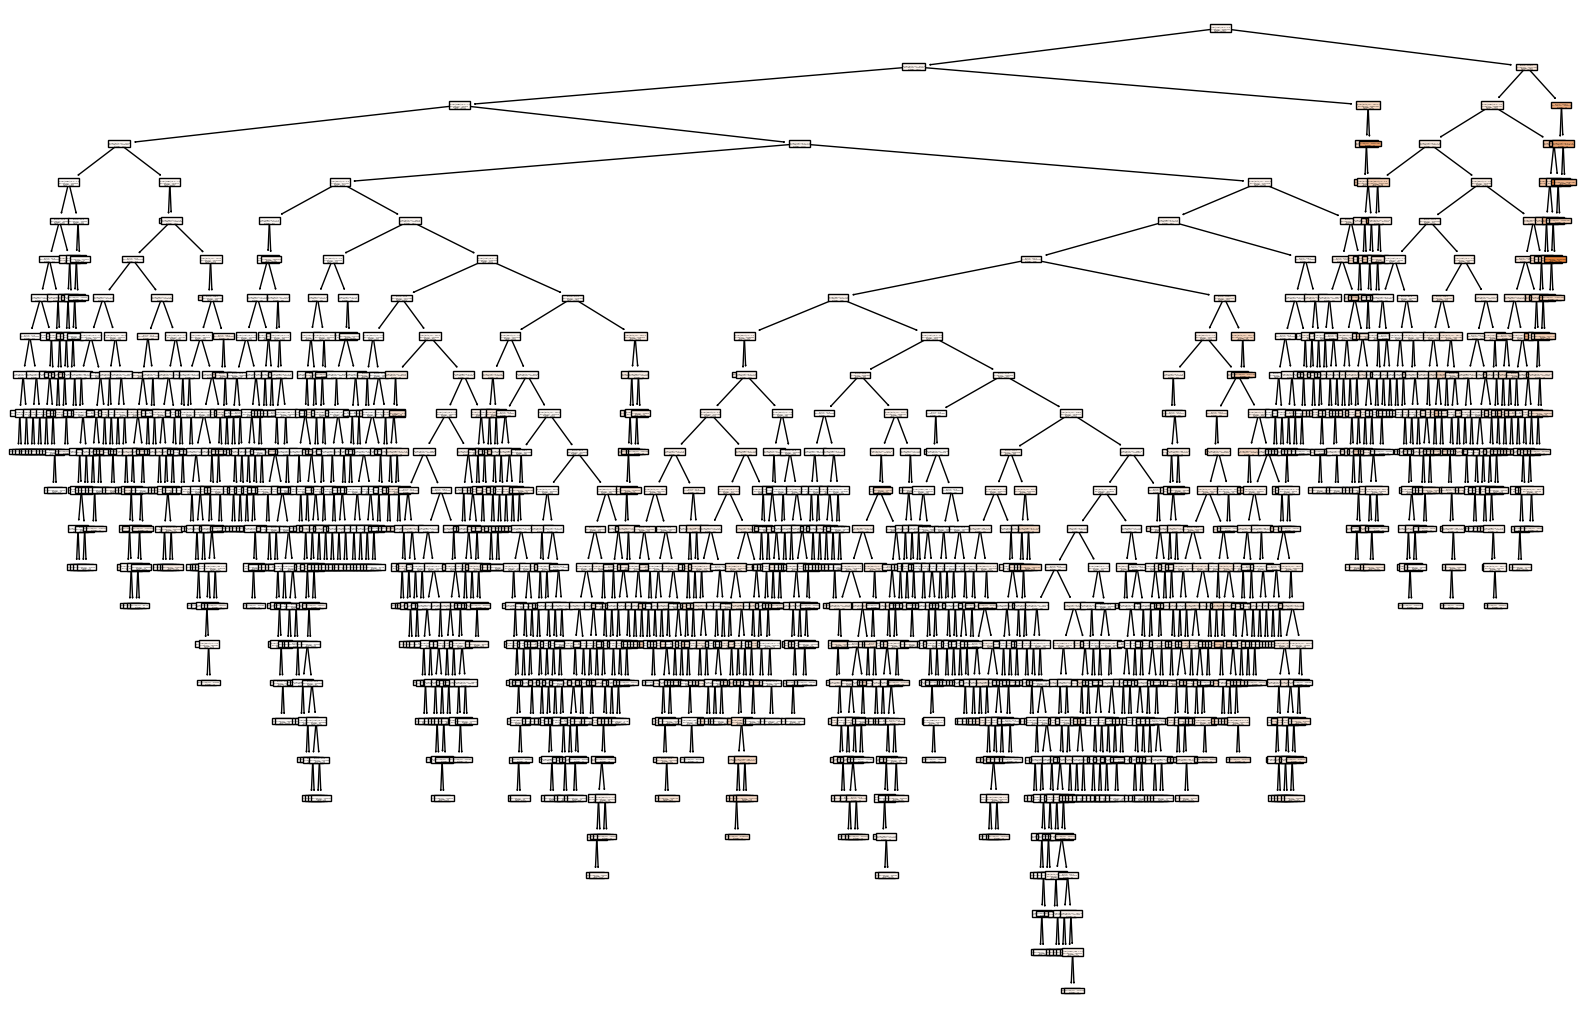

In [63]:
fig = plt.figure(figsize=(20,13))
_ = tree.plot_tree(best_regtree, 
                   feature_names=main_df.columns,
                   filled=True
                   )

plt.savefig("viz/reg_tree.png", transparent=True, bbox_inches="tight")

### Feature Importance and SHAP Values

In [55]:
perm1 = PermutationImportance(best_regtree, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm1, feature_names = X_test.columns.tolist())

In [56]:
explainer = shap.TreeExplainer(best_regtree, datamodel_output="raw", feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


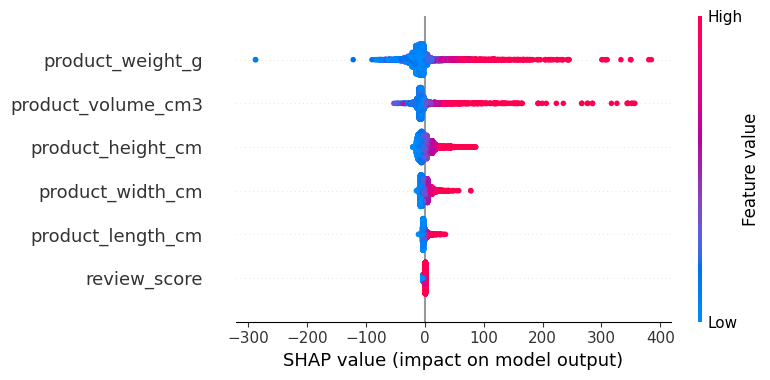

<Figure size 640x480 with 0 Axes>

In [64]:
shap.summary_plot(shap_values, X_test)

## Regression Tree for Price Optimization v2

### Creating alternate data using all numerical features

In [82]:
alt_df = sampled_df.copy()

label_encoder = LabelEncoder()

alt_df["product_category_name_english"] = label_encoder.fit_transform(alt_df["product_category_name_english"])
alt_df['is_weekday'] = label_encoder.fit_transform(alt_df["is_weekday"])

non_int_cols = alt_df.loc[:, (alt_df.dtypes != "int64") & (alt_df.dtypes != "datetime64[ns]") & (alt_df.dtypes != "object")].columns

for cols in non_int_cols:
    alt_df[cols] = alt_df[cols].astype("int64")

alt_df = alt_df.loc[:, alt_df.dtypes == "int64"]
alt_df.head()

price  review_score  product_weight_g  product_length_cm  \
69574      19             5               250                 16   
109365      9             5              1950                 20   
10626     122             4               700                 25   
79627      38             4               300                 30   
44343      74             4               850                 38   

        product_height_cm  product_width_cm  product_category_name_english  \
69574                  10                16                              7   
109365                  6                20                             64   
10626                  12                19                             43   
79627                  20                20                             16   
44343                  10                38                              7   

        day_of_week  is_weekday  month  year  hour  product_volume_cm3  
69574             5           0      7  2018     9                2560  
109365            4           1      5  2017    15                2400  
10626             1           1      8  2018    20                5700  
79627             3           1      2  2018    10               12000  
44343             4           1      1  2018    18               14440

In [83]:
#  split dataset in features and target variables
X2, y2 = alt_df.iloc[:, 1:], alt_df.iloc[:, 0]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1) # 70% training and 30% test

In [84]:
# Create Decision Tree Regressor
reg_tree2 = DecisionTreeRegressor(random_state=40)

# Train Decision Tree Regressor
reg_tree2 = reg_tree2.fit(X2_train,y2_train)

#  Evaluating the reg_tree2 
train_pred = reg_tree2.predict(X2_train)
train_score = reg_tree2.score(X2_train, y2_train)
train_mse = mean_squared_error(y2_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}")

#  Evaluating the reg_tree2 
test_pred = reg_tree2.predict(X2_test)
test_score = reg_tree2.score(X2_test, y2_test)
test_mse = mean_squared_error(y2_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

base_results_dict = {"score": test_score,
                     "MSE": test_mse,
                     "RMSE": test_mse**(1/2)}

Training Set Scores
MSE: 0.03193745030479724
RMSE: 0.17871052096840084
R-square: 0.9999990754935196
Testing Set Scores
MSE: 46511.577214407174
RMSE: 215.6654288809571
R-square: -0.0369060483696797


### Hyperparameter tuning

#### Using RandomizedSearchCV

In [85]:
reg_tree2_rs = DecisionTreeRegressor(random_state=40)
random_search = RandomizedSearchCV(estimator=reg_tree2_rs, 
                                   param_distributions=param_grid,
                                   verbose=3,
                                   return_train_score=True)
random_search = random_search.fit(X2_train, y2_train)

best_params_rs = random_search.best_params_
best_regtree2_rs = DecisionTreeRegressor(criterion=best_params_rs["criterion"],
                                        max_features=best_params_rs["max_features"],
                                        min_samples_leaf=best_params_rs["min_samples_leaf"],
                                        splitter=best_params_rs["splitter"],
                                        random_state=40)

best_regtree2_rs = best_regtree2_rs.fit(X2_train, y2_train)

training_score = best_regtree2_rs.score(X2_train, y2_train)

print(best_params_rs)

#  Evaluating the train set with best_regtree2_rs 
train_pred = best_regtree2_rs.predict(X2_train)
train_score = best_regtree2_rs.score(X2_train, y2_train)
train_mse = mean_squared_error(y2_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}\n")

#  Evaluating the test set with best_regtree2_rs 
test_pred = best_regtree2_rs.predict(X2_test)
test_score = best_regtree2_rs.score(X2_test, y2_test)
test_mse = mean_squared_error(y2_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

rs_results_dict = {"score": test_score,
                   "MSE": test_mse,
                   "RMSE": test_mse**(1/2)}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=squared_error, max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=(train=0.129, test=0.068) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=(train=0.135, test=0.109) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=(train=0.128, test=0.085) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=(train=0.131, test=0.062) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=(train=0.137, test=0.132) total time=   0.0s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=(train=0.275, test=0.141)

#### Using GridSearchCV

In [86]:
reg_tree2_gs = DecisionTreeRegressor(random_state=40)
grid_search = GridSearchCV(estimator=reg_tree2_gs, 
                           param_grid=param_grid,
                           verbose=3,
                           return_train_score=True)
grid_search = grid_search.fit(X2_train, y2_train)

best_params_gs = grid_search.best_params_
best_regtree2_gs = DecisionTreeRegressor(criterion=best_params_gs["criterion"],
                                        max_features=best_params_gs["max_features"],
                                        min_samples_leaf=best_params_gs["min_samples_leaf"],
                                        splitter=best_params_gs["splitter"],
                                        random_state=40)

best_regtree2_gs = best_regtree2_gs.fit(X2_train, y2_train)

training_score = best_regtree2_gs.score(X2_train, y2_train)

print(best_params_gs)

#  Evaluating the train set with best_regtree2_gs 
train_pred = best_regtree2_gs.predict(X2_train)
train_score = best_regtree2_gs.score(X2_train, y2_train)
train_mse = mean_squared_error(y2_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}\n")

#  Evaluating the test set with best_regtree2_gs 
test_pred = best_regtree2_gs.predict(X2_test)
test_score = best_regtree2_gs.score(X2_test, y2_test)
test_mse = mean_squared_error(y2_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

gs_results_dict = {"score": test_score,
                   "MSE": test_mse,
                   "RMSE": test_mse**(1/2)}

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV 1/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.198, test=0.103) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.194, test=0.154) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.211, test=0.107) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.206, test=0.069) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=(train=0.196, test=0.165) total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=(train=0.113, test=0.105) total time

#### Selecting best parameters to use from the 3 different parameters suggested (using test scores as metric)

In [87]:
base_results_dict

{'score': -0.0369060483696797,
 'MSE': 46511.577214407174,
 'RMSE': 215.6654288809571}

In [88]:
rs_results_dict

{'score': 0.1752083201132263,
 'MSE': 36996.950654469765,
 'RMSE': 192.345914057122}

In [89]:
gs_results_dict

{'score': 0.19522057599930875,
 'MSE': 36099.27859792858,
 'RMSE': 189.9981015640119}

### Modelling Best Regression Tree v2

In [90]:
best_regtree2 = DecisionTreeRegressor(criterion=best_params_gs["criterion"],
                                     max_features=best_params_gs["max_features"],
                                     min_samples_leaf=best_params_gs["min_samples_leaf"],
                                     splitter=best_params_gs["splitter"],
                                     random_state=40
                                     )

best_regtree2 = best_regtree2.fit(X2_train, y2_train)

training_score = best_regtree2.score(X2_train, y2_train)

#  Evaluating the train set with best_regtree2 
train_pred = best_regtree2.predict(X2_train)
train_score = best_regtree2.score(X2_train, y2_train)
train_mse = mean_squared_error(y2_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}\n")

#  Evaluating the test set with best_regtree2 
test_pred = best_regtree2.predict(X2_test)
test_score = best_regtree2.score(X2_test, y2_test)
test_mse = mean_squared_error(y2_test, test_pred)
test_mae = mean_absolute_error(y2_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

Training Set Scores
MSE: 19501.80496289425
RMSE: 139.6488630920218
R-square: 0.43547324865203163

Testing Set Scores
MSE: 36099.27859792858
MAE: 63.341706600711085
RMSE: 189.9981015640119
R-square: 0.19522057599930875


### Visualizing the Regression Tree v2

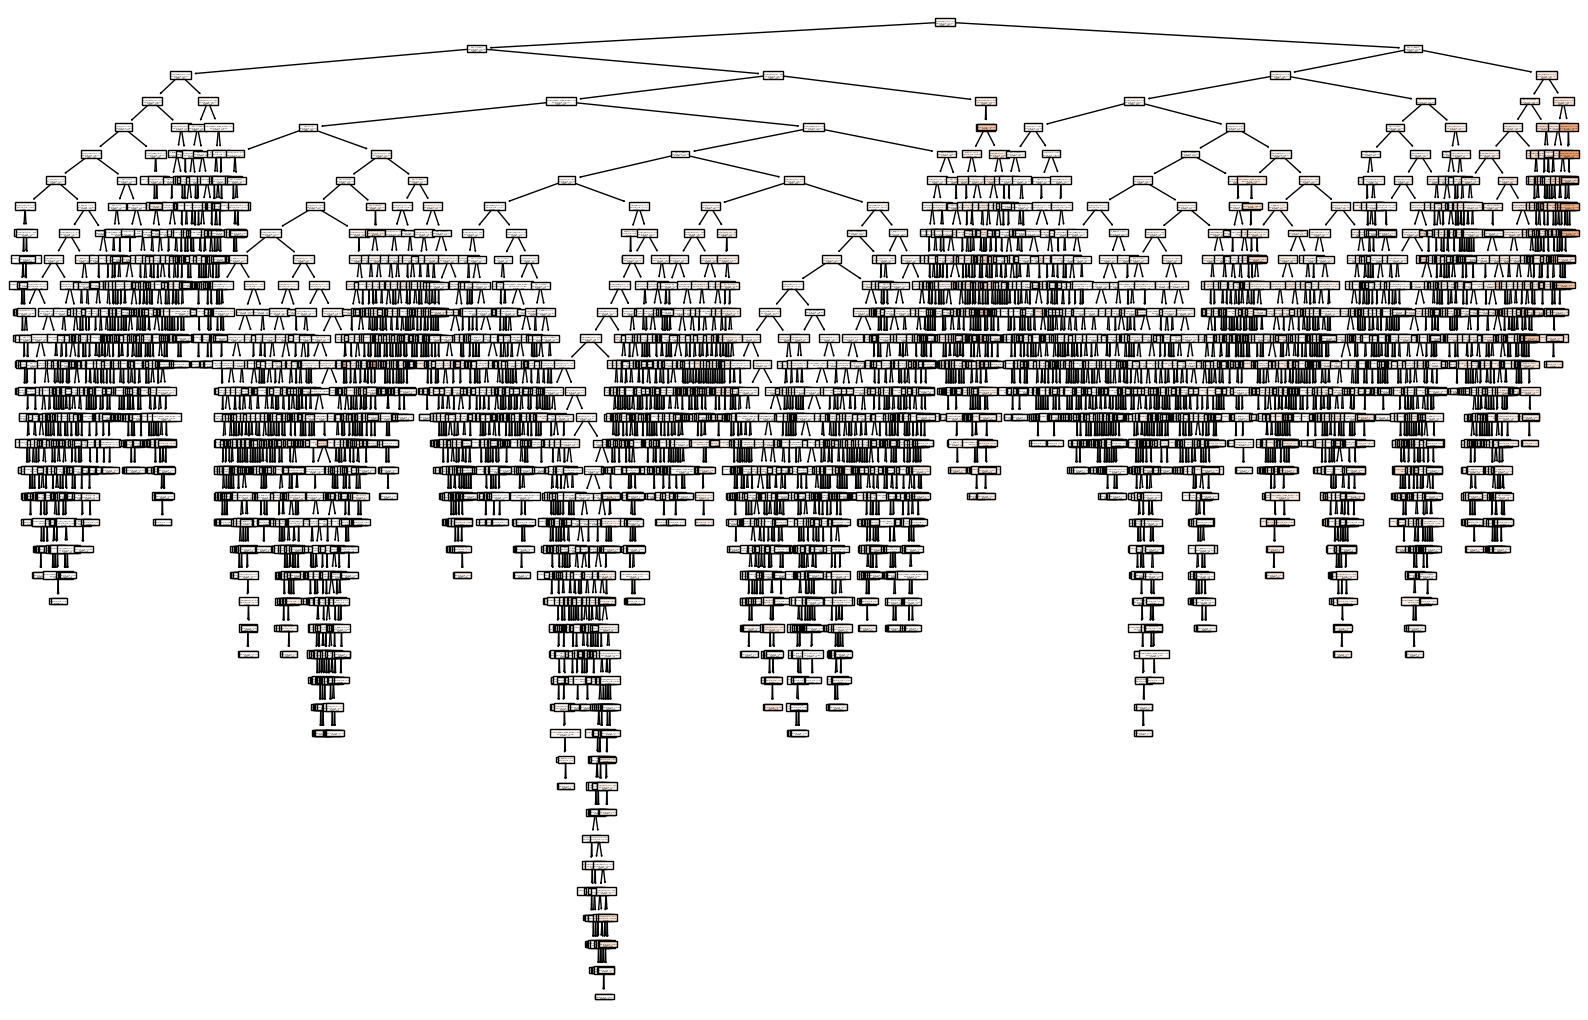

In [91]:
fig = plt.figure(figsize=(20,13))
_ = tree.plot_tree(best_regtree2, 
                   feature_names=alt_df.columns,
                   filled=True
                   )

plt.savefig("viz/reg_tree2.png", transparent=True, bbox_inches="tight")

### Feature Importance and SHAP Values

In [92]:
perm2 = PermutationImportance(best_regtree2, random_state=1).fit(X2_test, y2_test)
eli5.show_weights(perm2, feature_names = X2_test.columns.tolist())

In [93]:
explainer = shap.TreeExplainer(best_regtree2, datamodel_output="raw", feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X2_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


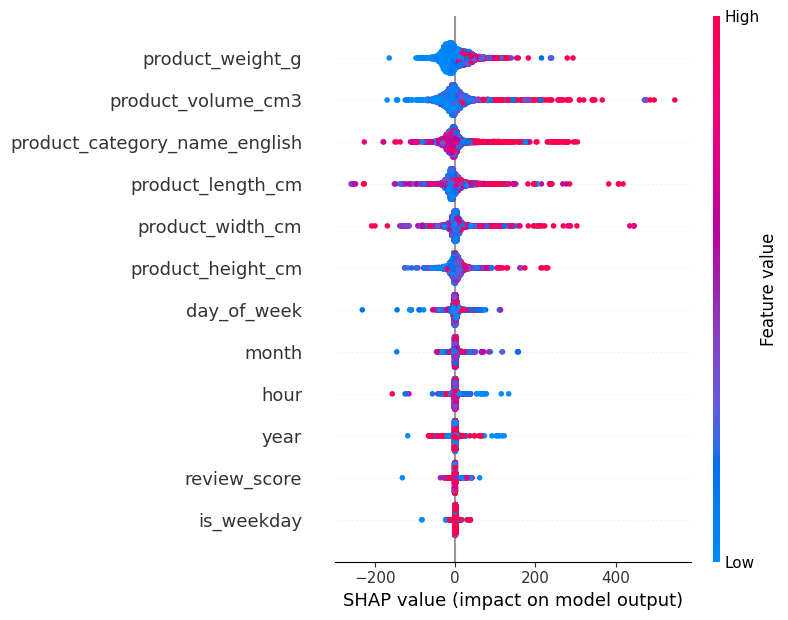

In [94]:
shap.summary_plot(shap_values, X2_test)

## Multiple Linear Regression for Price Optimization

### Building the Multiple Linear Regression model

In [58]:
multiple_linreg = LinearRegression()
multiple_linreg = multiple_linreg.fit(X_train, y_train)

### Evaluating the Multiple Linear Regression model    

In [59]:
#  Evaluating the train set with multiple_linreg 
train_pred = multiple_linreg.predict(X_train)
train_score = multiple_linreg.score(X_train, y_train)
train_mse = mean_squared_error(y_train, train_pred)
print("Training Set Scores")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_mse**(1/2)}")
print(f"R-square: {train_score}\n")

#  Evaluating the test set with multiple_linreg 
test_pred = multiple_linreg.predict(X_test)
test_score = multiple_linreg.score(X_test, y_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("Testing Set Scores")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_mse**(1/2)}")
print(f"R-square: {test_score}")

Training Set Scores
MSE: 30023.507213083914
RMSE: 173.27292694787582
R-square: 0.13089721575396374

Testing Set Scores
MSE: 40114.7566045349
MAE: 87.4570280866081
RMSE: 200.28668603912467
R-square: 0.1057014996422121


### Feature importance and SHAP values

In [60]:
perm3 = PermutationImportance(multiple_linreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm3, feature_names = X_test.columns.tolist())

In [61]:
explainer = shap.Explainer(multiple_linreg, masker=shap.maskers.Impute(data=X_train), algorithm="linear")
shap_values = explainer.shap_values(X_test)

Estimating transforms: 100%|██████████| 1000/1000 [00:00<00:00, 3249.42it/s]


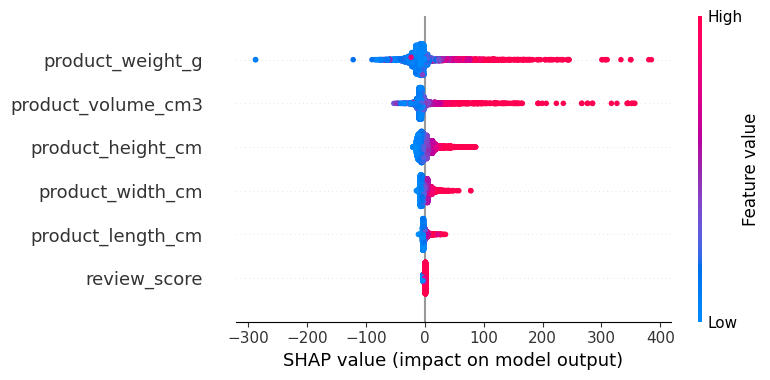

<Figure size 640x480 with 0 Axes>

In [65]:
shap.summary_plot(shap_values, X_test)